In [2]:
import torch
import pickle
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(0)
torch.manual_seed(0)
np.random.seed(0)

In [3]:
# dump_file = "../data/processed/sbert_embeddings.dat"
# with open(dump_file, "rb") as f:
#     embeddings = pickle.load(f)

# print(embeddings.shape)

In [4]:
## read in the dataset
df = pd.read_csv("../data/stimuli_idioms_clean.csv")
# dataset = df[["item"]]
# norm_freq_en = df["fitem"]

# get the previously calculated embeddings from the file in which they were stored
# requires running run_one_experiment.py or run_all_experiments.py first
embeddings_cache_filename = "../data/processed/sbert_stimuli_idioms_clean-last_1-kwics-concat.dat"
with open(embeddings_cache_filename, "rb") as colloc2BERTfile:
    colloc_embeddings = pickle.load(colloc2BERTfile)

In [5]:
collocs = list(colloc_embeddings.keys())
embeddings = torch.stack([colloc_embeddings[colloc]["vec"] for colloc in collocs])

# norm embeddings (same as in run_one_experiment.py)
embeddings = (embeddings - embeddings.mean()) / embeddings.std()

print(embeddings.shape)
colloc_embeddings = pd.DataFrame(
    {
        "item": collocs,
        "vec": embeddings.tolist(),
    }
)
colloc_embeddings

torch.Size([246, 768])


item                                                vec
0    abandon ship  [0.6813992857933044, 0.6821767687797546, 2.079...
1    battle demon  [0.28214821219444275, 0.708100438117981, 0.367...
2       beat drum  [1.1023974418640137, 0.3866420090198517, 1.302...
3       bend knee  [0.0939703956246376, 1.617830753326416, -1.054...
4      blow smoke  [1.4555710554122925, 0.6088924407958984, 1.256...
..            ...                                                ...
241  fuel passion  [0.11440841853618622, 0.43344083428382874, 0.4...
242      fan fear  [0.5318445563316345, 0.07368212193250656, 0.18...
243  sweeten deal  [-0.12492208182811737, 0.14423401653766632, 0....
244    close case  [0.5094650387763977, 0.1782718300819397, 0.642...
245   run country  [1.07825767993927, 0.10810703784227371, 0.8213...

[246 rows x 2 columns]

In [6]:
df_expanded = df.merge(colloc_embeddings, on="item")
df_expanded

item  fitem  score         type     verb       noun  \
0        abandon ship  16629    7.9        idiom  abandon       ship   
1    abandon building  15935    7.2         prod  abandon   building   
2        abandon plan  19302    6.7  collocation  abandon       plan   
3        battle demon   4244    8.0        idiom   battle      demon   
4        battle enemy   3316    6.4         prod   battle      enemy   
..                ...    ...    ...          ...      ...        ...   
241        unlock car   5734    5.3         prod   unlock        car   
242  unlock potential  27122    8.5  collocation   unlock  potential   
243         weave web   6389    7.9        idiom    weave        web   
244      weave basket   7588    8.5         prod    weave     basket   
245       weave story  15961    6.1  collocation    weave      story   

     stimuli_grammatical     stimuli_plural  \
0           abandon ship       abandon ship   
1       abandon building  abandon buildings   
2       abandon the plan      abandon plans   
3    battle one's demons      battle demons   
4       battle the enemy     battle enemies   
..                   ...                ...   
241       unlock the car        unlock cars   
242     unlock potential   unlock potential   
243          weave a web         weave webs   
244       weave a basket      weave baskets   
245        weave a story      weave stories   

                                                   vec  
0    [0.6813992857933044, 0.6821767687797546, 2.079...  
1    [0.6555113792419434, 0.733307421207428, 0.8596...  
2    [0.8033574223518372, 0.8661871552467346, 1.792...  
3    [0.28214821219444275, 0.708100438117981, 0.367...  
4    [0.41101789474487305, 0.6878573894500732, 0.11...  
..                                                 ...  
241  [-1.069042682647705, 0.49273478984832764, -0.1...  
242  [-0.46213677525520325, 0.435224324464798, 0.00...  
243  [-0.04823963716626167, -0.14014706015586853, 0...  
244  [0.5938814878463745, 0.4889236092567444, 0.583...  
245  [-0.08408898860216141, 0.09414128959178925, 0....  

[246 rows x 9 columns]

In [7]:
results = pd.read_csv("../results/results-stimuli_idioms_clean-sbert-300p-last_1-kwics-concat-m2k_0.99-m2mi_100.csv")
activations = pd.read_json("../results/results-stimuli_idioms_clean-sbert-300p-last_1-kwics-concat-m2k_0.99-m2mi_100_activations.json", orient="index")

In [8]:
joint = results.merge(activations, on=("item", "participant")).merge(df_expanded, on="item")
joint

item       act  rt  n_kwics       id  participant  \
0      abandon ship  0.994129   3      100  6463343            1   
1      battle demon  0.992403   5      100  6463343            1   
2         beat drum  0.993219   5      100  6463343            1   
3         bend knee  0.991666   7      100  6463343            1   
4        blow smoke  0.983879  99      100  6463343            1   
...             ...       ...  ..      ...      ...          ...   
73795  fuel passion  0.926899  99      100  2533748          300   
73796      fan fear  0.991701   8      100  2533748          300   
73797  sweeten deal  0.886490  99      100  2533748          300   
73798    close case  0.992656   4      100  2533748          300   
73799   run country  0.990589   3      100  2533748          300   

      embedding_model  is_noise_embeddings  is_equal_frequency  minerva_k  \
0               sbert                False               False       0.99   
1               sbert                False               False       0.99   
2               sbert                False               False       0.99   
3               sbert                False               False       0.99   
4               sbert                False               False       0.99   
...               ...                  ...                 ...        ...   
73795           sbert                False               False       0.99   
73796           sbert                False               False       0.99   
73797           sbert                False               False       0.99   
73798           sbert                False               False       0.99   
73799           sbert                False               False       0.99   

       ...                                      activations_0  \
0      ...  [0.0016219119, 1.46322e-05, 0.0001169692, -7.2...   
1      ...  [6.3605e-06, 0.0013055577, 0.0001306476, 1.637...   
2      ...  [7.681450000000001e-05, 9.86095e-05, 0.0009827...   
3      ...  [-5.44072e-05, 2.09198e-05, 6.5729e-06, 0.0012...   
4      ...  [-6.14992e-05, 0.0001300747, 0.000373637700000...   
...    ...                                                ...   
73795  ...  [-8.30702e-05, 6.56462e-05, 9.698170000000001e...   
73796  ...  [6.42237e-05, 0.00032801200000000003, 9.70066e...   
73797  ...  [8.1007e-05, 2.8889e-06, 8.9767e-06, 0.0001484...   
73798  ...  [0.0003867122, -8.066e-07, 3.65302e-05, 3.4201...   
73799  ...  [0.0001117112, 4.33615e-05, 0.0001947394, 9.55...   

                                         activations_tau  fitem score  \
0      [0.020824166, 1.2350000000000001e-07, 8.9769e-...  16629   7.9   
1      [0.0, 0.050604146, 5.845e-07, 7.00000000000000...   4244   8.0   
2      [1.289e-07, 4.361e-07, 0.035223562300000004, 2...  15198   8.0   
3      [-1e-10, 0.0, 0.0, 0.09104201940000001, 1e-10,...  27701  10.5   
4      [0.0, 0.0, 0.0, 0.0, 0.200000003, 0.0, 0.0, 0....  11725   8.6   
...                                                  ...    ...   ...   
73795  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.38821970...   4510   7.0   
73796  [0.0, 2.293e-07, 0.0, -0.0, 1.8e-09, -0.0, 1.1...    846   7.4   
73797  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   8402   6.5   
73798  [0.000108967, -3.0000000000000004e-09, 4.27e-0...  27515   6.5   
73799  [7.1407e-06, 6.947e-07, 3.31772e-05, 4.4405e-0...  42155   6.7   

              type     verb     noun  stimuli_grammatical stimuli_plural  \
0            idiom  abandon     ship         abandon ship   abandon ship   
1            idiom   battle    demon  battle one's demons  battle demons   
2            idiom     beat     drum      beat one's drum     beat drums   
3            idiom     bend     knee        bend the knee     bend knees   
4            idiom     blow    smoke           blow smoke     blow smoke   
...            ...      ...      ...                  ...            ...   
73795  collocation     fuel  passion   fuel one's passion   fuel passion   
73796  

In [9]:
# # plot distribution of rt's by item
# g = sns.FacetGrid(joint, col="item", col_wrap=5, height=2, aspect=1)
# g.map(sns.boxplot, "rt")

In [10]:
# average the activations over all participants
activations_0 = joint.groupby("item")["activations_0"].apply(
    lambda x: torch.tensor(x.tolist())
).reindex(collocs) # reindex to sort by the same order as the vector
activations_tau = joint.groupby("item")["activations_tau"].apply(
    lambda x: torch.tensor(x.tolist())
).reindex(collocs)

activations_0 = activations_0.apply(lambda x: x / x.norm(p=1, dim=1, keepdim=True))
activations_tau = activations_tau.apply(lambda x: x / x.norm(p=1, dim=1, keepdim=True))

In [11]:
import torch.nn.functional as F

idioms = torch.tensor(df_expanded[df_expanded["type"] == "idiom"]["vec"].tolist())
idioms = F.normalize(idioms, p=2, dim=1)

c = (idioms @ idioms.T).fill_diagonal_(0)
# c = c / c.norm(p=1, dim=1, keepdim=True)
c.mean()
# v, _ = c.max(dim=1)
# v.mean()

tensor(0.0833)

In [12]:
joint

item       act  rt  n_kwics       id  participant  \
0      abandon ship  0.994129   3      100  6463343            1   
1      battle demon  0.992403   5      100  6463343            1   
2         beat drum  0.993219   5      100  6463343            1   
3         bend knee  0.991666   7      100  6463343            1   
4        blow smoke  0.983879  99      100  6463343            1   
...             ...       ...  ..      ...      ...          ...   
73795  fuel passion  0.926899  99      100  2533748          300   
73796      fan fear  0.991701   8      100  2533748          300   
73797  sweeten deal  0.886490  99      100  2533748          300   
73798    close case  0.992656   4      100  2533748          300   
73799   run country  0.990589   3      100  2533748          300   

      embedding_model  is_noise_embeddings  is_equal_frequency  minerva_k  \
0               sbert                False               False       0.99   
1               sbert                False               False       0.99   
2               sbert                False               False       0.99   
3               sbert                False               False       0.99   
4               sbert                False               False       0.99   
...               ...                  ...                 ...        ...   
73795           sbert                False               False       0.99   
73796           sbert                False               False       0.99   
73797           sbert                False               False       0.99   
73798           sbert                False               False       0.99   
73799           sbert                False               False       0.99   

       ...                                      activations_0  \
0      ...  [0.0016219119, 1.46322e-05, 0.0001169692, -7.2...   
1      ...  [6.3605e-06, 0.0013055577, 0.0001306476, 1.637...   
2      ...  [7.681450000000001e-05, 9.86095e-05, 0.0009827...   
3      ...  [-5.44072e-05, 2.09198e-05, 6.5729e-06, 0.0012...   
4      ...  [-6.14992e-05, 0.0001300747, 0.000373637700000...   
...    ...                                                ...   
73795  ...  [-8.30702e-05, 6.56462e-05, 9.698170000000001e...   
73796  ...  [6.42237e-05, 0.00032801200000000003, 9.70066e...   
73797  ...  [8.1007e-05, 2.8889e-06, 8.9767e-06, 0.0001484...   
73798  ...  [0.0003867122, -8.066e-07, 3.65302e-05, 3.4201...   
73799  ...  [0.0001117112, 4.33615e-05, 0.0001947394, 9.55...   

                                         activations_tau  fitem score  \
0      [0.020824166, 1.2350000000000001e-07, 8.9769e-...  16629   7.9   
1      [0.0, 0.050604146, 5.845e-07, 7.00000000000000...   4244   8.0   
2      [1.289e-07, 4.361e-07, 0.035223562300000004, 2...  15198   8.0   
3      [-1e-10, 0.0, 0.0, 0.09104201940000001, 1e-10,...  27701  10.5   
4      [0.0, 0.0, 0.0, 0.0, 0.200000003, 0.0, 0.0, 0....  11725   8.6   
...                                                  ...    ...   ...   
73795  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.38821970...   4510   7.0   
73796  [0.0, 2.293e-07, 0.0, -0.0, 1.8e-09, -0.0, 1.1...    846   7.4   
73797  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   8402   6.5   
73798  [0.000108967, -3.0000000000000004e-09, 4.27e-0...  27515   6.5   
73799  [7.1407e-06, 6.947e-07, 3.31772e-05, 4.4405e-0...  42155   6.7   

              type     verb     noun  stimuli_grammatical stimuli_plural  \
0            idiom  abandon     ship         abandon ship   abandon ship   
1            idiom   battle    demon  battle one's demons  battle demons   
2            idiom     beat     drum      beat one's drum     beat drums   
3            idiom     bend     knee        bend the knee     bend knees   
4            idiom     blow    smoke           blow smoke     blow smoke   
...            ...      ...      ...                  ...            ...   
73795  collocation     fuel  passion   fuel one's passion   fuel passion   
73796  

<Axes: title={'center': 'Average activations for each item at final tau'}>

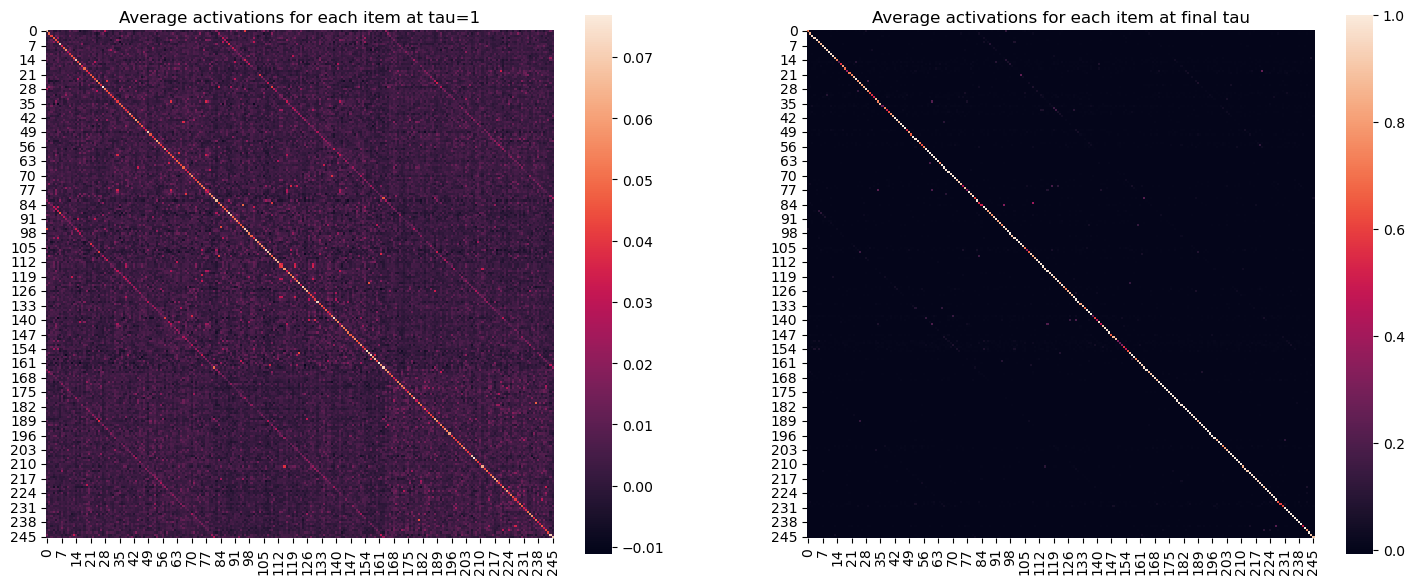

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(18,7))
ax[0].set(title="Average activations for each item at tau=1")
ax[1].set(title="Average activations for each item at final tau")
sns.heatmap([g.mean(dim=0) for g in activations_0], ax=ax[0], square=True)
sns.heatmap([g.mean(dim=0) for g in activations_tau], ax=ax[1], square=True)

<Axes: title={'center': 'Std dev of activations for each item at final tau'}>

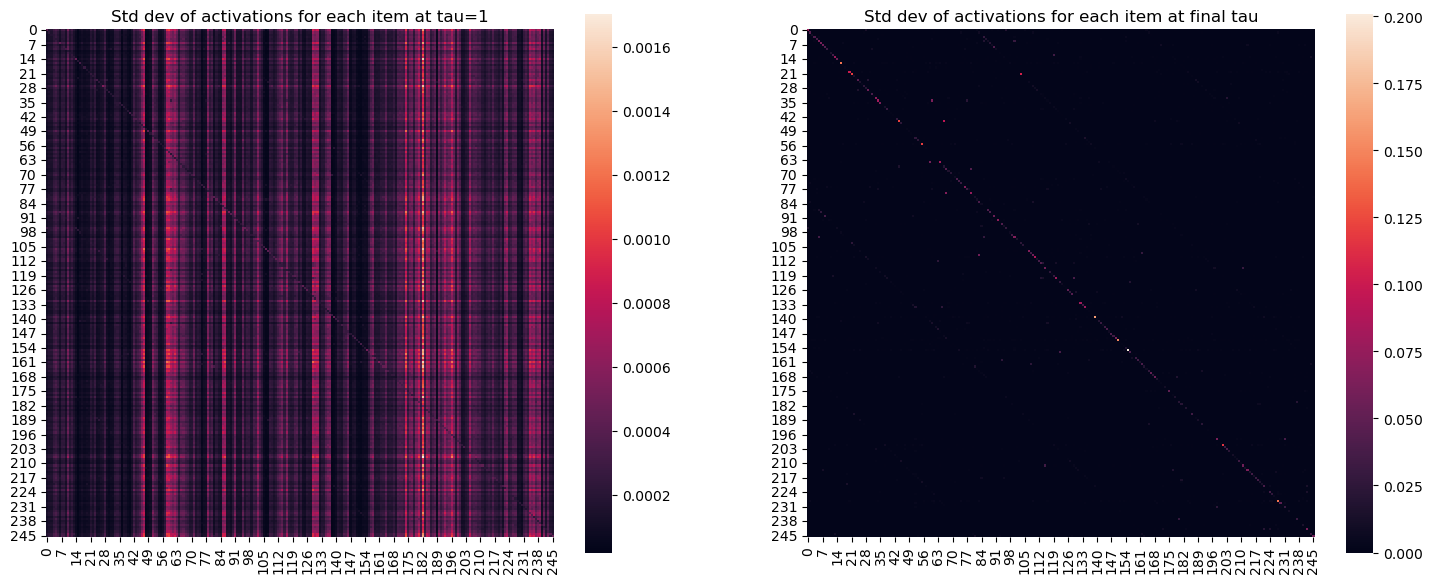

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(18,7))
ax[0].set(title="Std dev of activations for each item at tau=1")
ax[1].set(title="Std dev of activations for each item at final tau")
sns.heatmap([g.std(dim=0) for g in activations_0], ax=ax[0], square=True)
sns.heatmap([g.std(dim=0) for g in activations_tau], ax=ax[1], square=True)

mean_rt     std_rt
type                             
collocation  62.882683  40.686393
idiom        32.545366  38.240434
prod         33.102724  38.882674

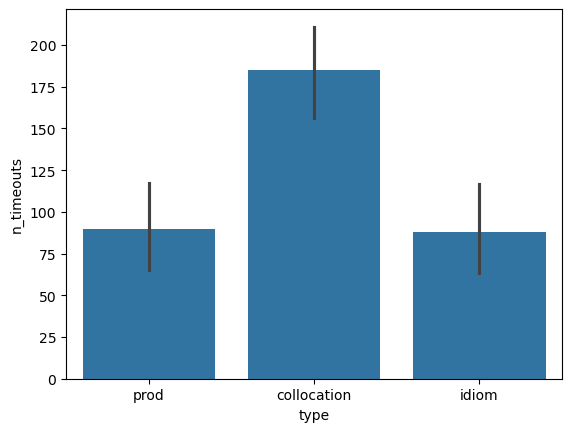

In [15]:
agg_results = results.groupby("item", as_index=False).aggregate(
    mean_rt=("rt", "mean"),
    std_rt=("rt", "std"),
    n_timeouts = ("rt", lambda x: (x >= 99).sum()),
)
agg_results = agg_results.join(df_expanded.set_index("item"), on="item")
sns.barplot(data=agg_results, y="n_timeouts", x="type")
agg_results.groupby("type").agg(
    mean_rt=("mean_rt", "mean"),
    std_rt=("mean_rt", "std"),
)

In [16]:
activations_0_stack = torch.stack(activations_0.apply(lambda x: x.mean(dim=0)).tolist())
activations_tau_stack = torch.stack(activations_tau.apply(lambda x: x.mean(dim=0)).tolist())

In [17]:
_mean_activations = []

df_index = df_expanded.set_index("item")

for i, item_i in enumerate(collocs):
    for j, item_j in enumerate(collocs):
        _mean_activations.append({
            "item_i": item_i,
            "item_j": item_j,
            "type_i": df_index.loc[item_i, "type"],
            "type_j": df_index.loc[item_j, "type"],
            "mean_activation_0": activations_0_stack[i, j].item(),
            "mean_activation_tau": activations_tau_stack[i, j].item(),
        })

mean_activations_by_item_pair = pd.DataFrame(_mean_activations)
mean_activations_by_item_pair

item_i        item_j       type_i       type_j  \
0      abandon ship  abandon ship        idiom        idiom   
1      abandon ship  battle demon        idiom        idiom   
2      abandon ship     beat drum        idiom        idiom   
3      abandon ship     bend knee        idiom        idiom   
4      abandon ship    blow smoke        idiom        idiom   
...             ...           ...          ...          ...   
60511   run country  fuel passion  collocation  collocation   
60512   run country      fan fear  collocation  collocation   
60513   run country  sweeten deal  collocation  collocation   
60514   run country    close case  collocation  collocation   
60515   run country   run country  collocation  collocation   

       mean_activation_0  mean_activation_tau  
0               0.069021             0.746454  
1               0.000552             0.000002  
2               0.004972             0.000174  
3              -0.003096            -0.000044  
4              -0.003027            -0.000041  
...                  ...                  ...  
60511           0.003860             0.000065  
60512          -0.002656            -0.000022  
60513          -0.000164            -0.000001  
60514           0.006442             0.000207  
60515           0.070024             0.909124  

[60516 rows x 6 columns]

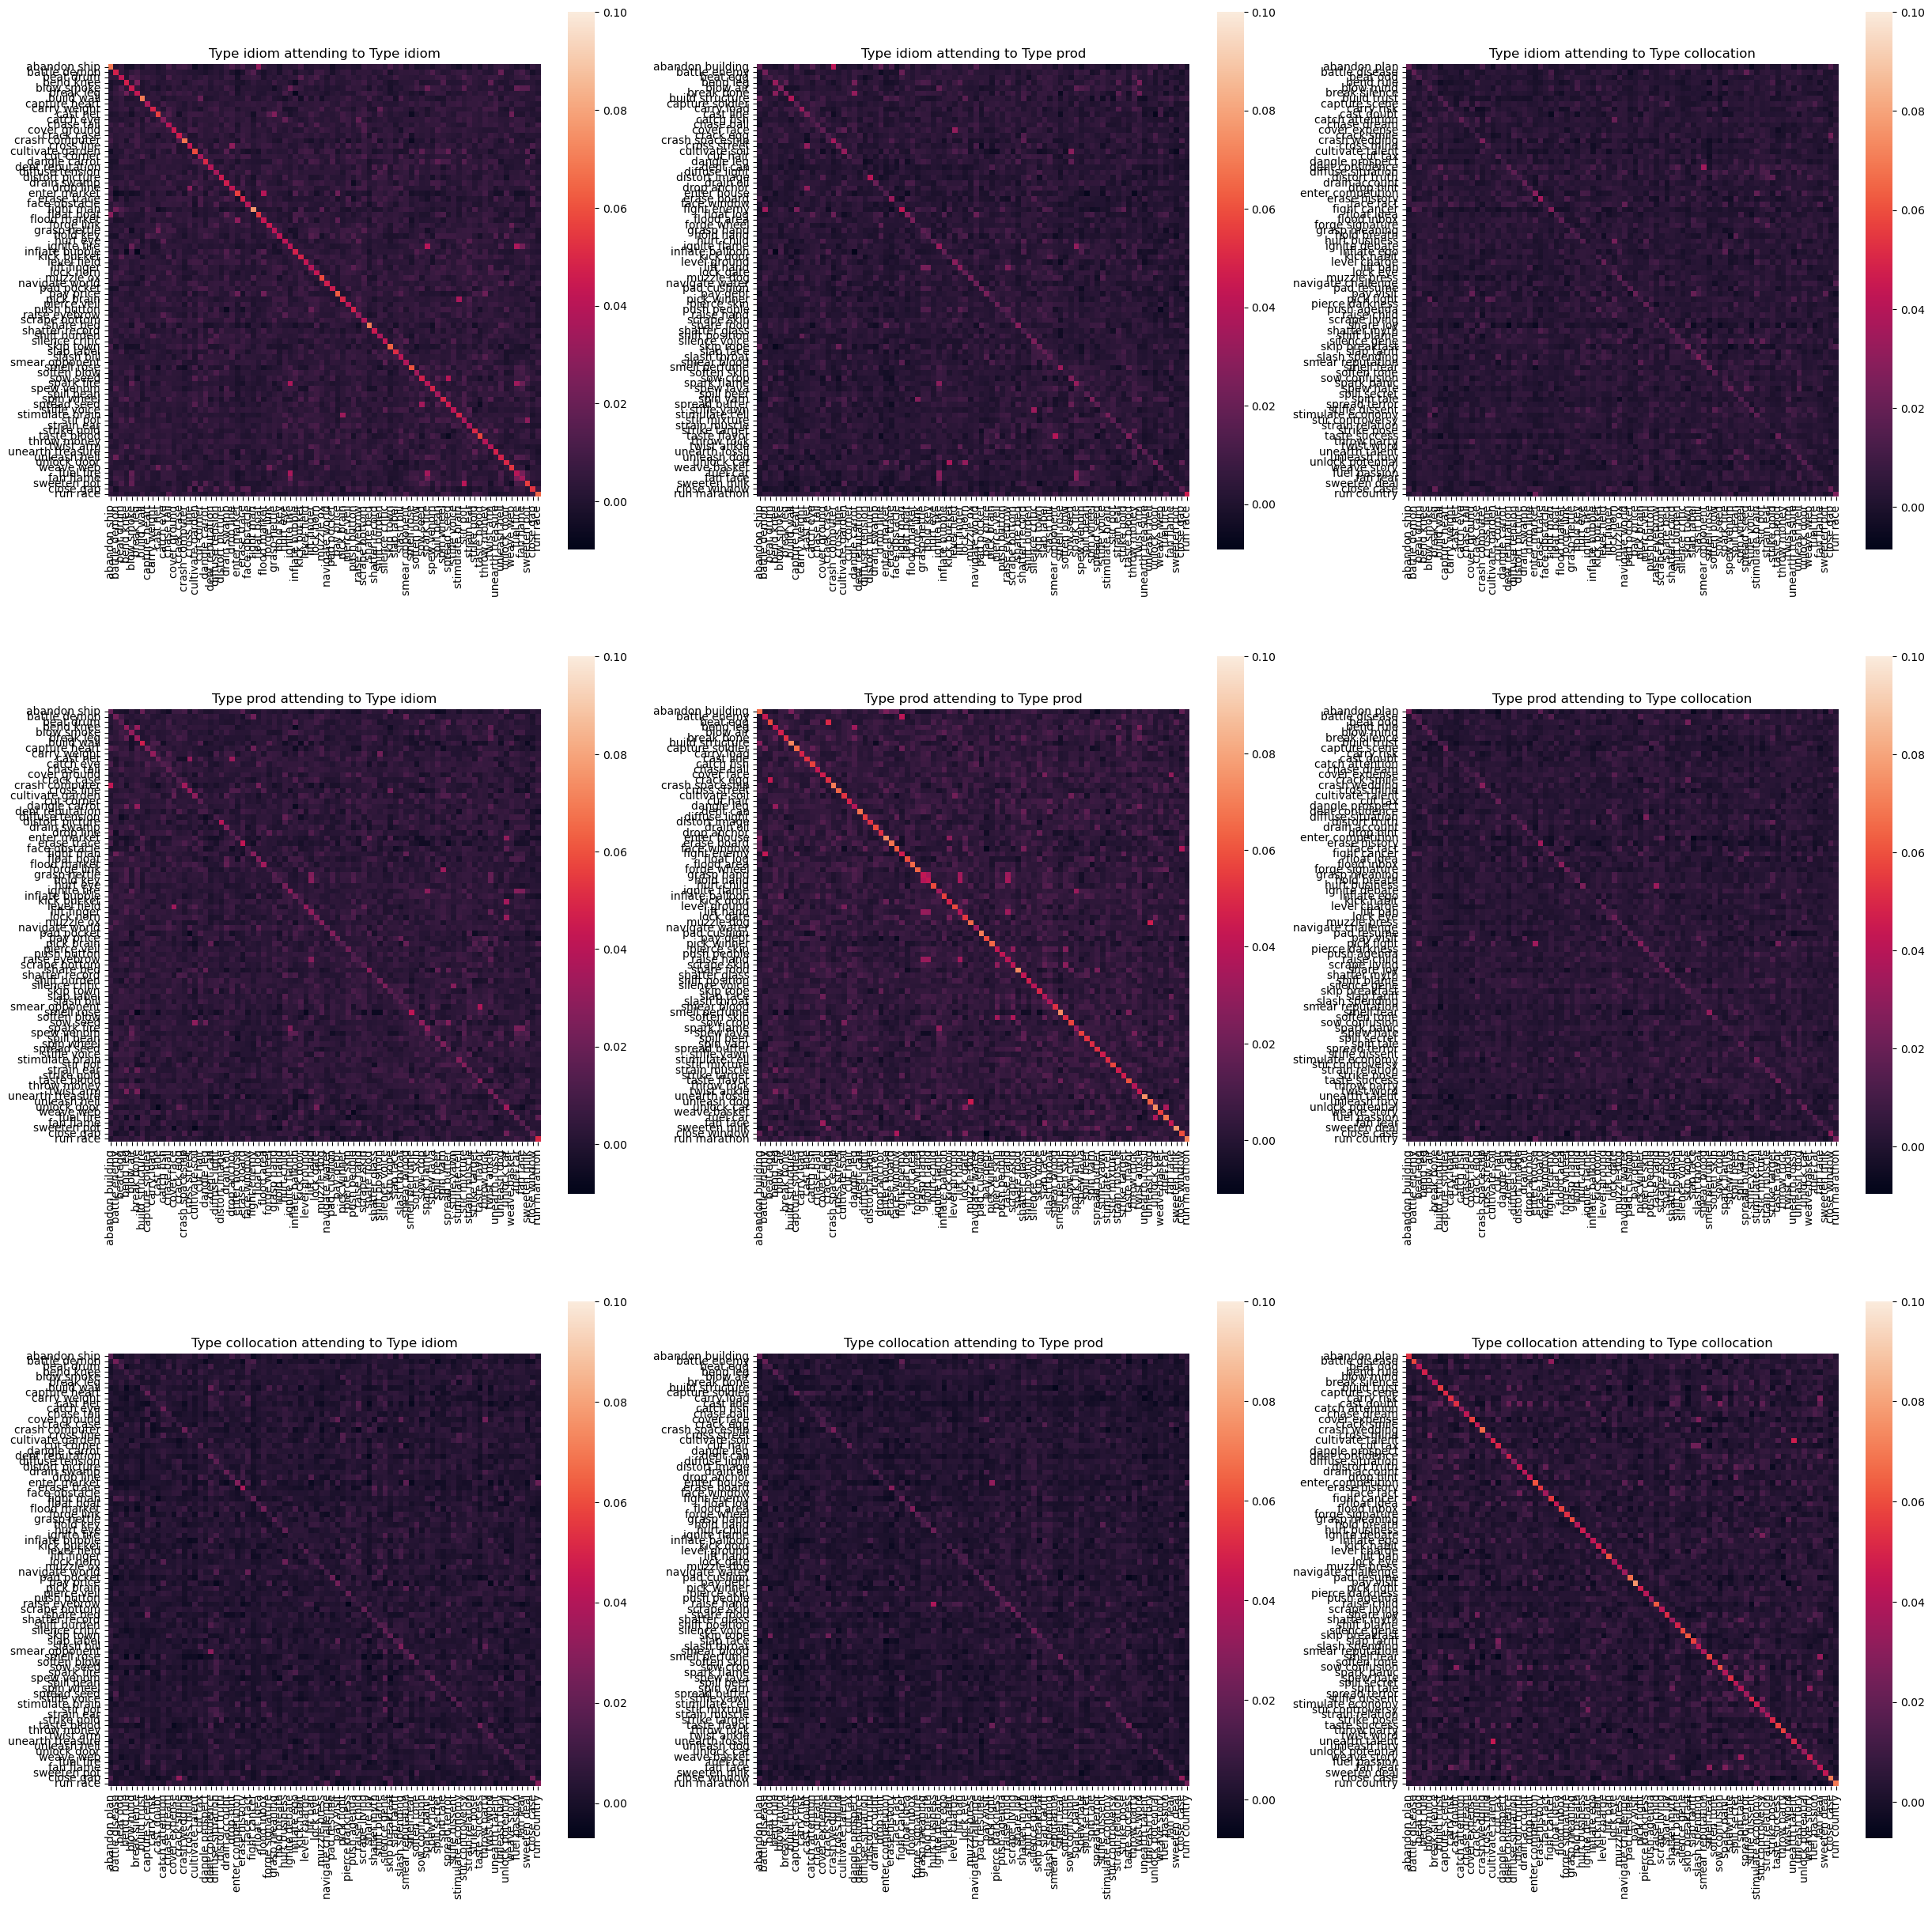

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

# cross_type_activations_0 = {}

for i, type_i in enumerate(df_expanded["type"].unique()):
    for j, type_j in enumerate(df_expanded["type"].unique()):
        ax = axes[i, j]
        type_i_items = [item for item in collocs if df_index.loc[item]["type"] == type_i]
        type_i_selector = [i for i, item in enumerate(collocs) if item in type_i_items]
        type_j_items = [item for item in collocs if df_index.loc[item]["type"] == type_j]
        type_j_selector = [i for i, item in enumerate(collocs) if item in type_j_items]


        type_activations = activations_0_stack[type_i_selector, :][:, type_j_selector]
        xticklabels = type_i_items
        yticklabels = type_j_items
        ax.set_title(f"Type {type_i} attending to Type {type_j}")
        sns.heatmap(type_activations, ax=ax, square=True, xticklabels=xticklabels, yticklabels=yticklabels, vmax=0.1)
        # cross_type_activations_0[(type_i, type_j)] = {
        #     "activations": type_activations,
        #     "type_i_items": type_i_items,
        #     "type_j_items": type_j_items,
        # }

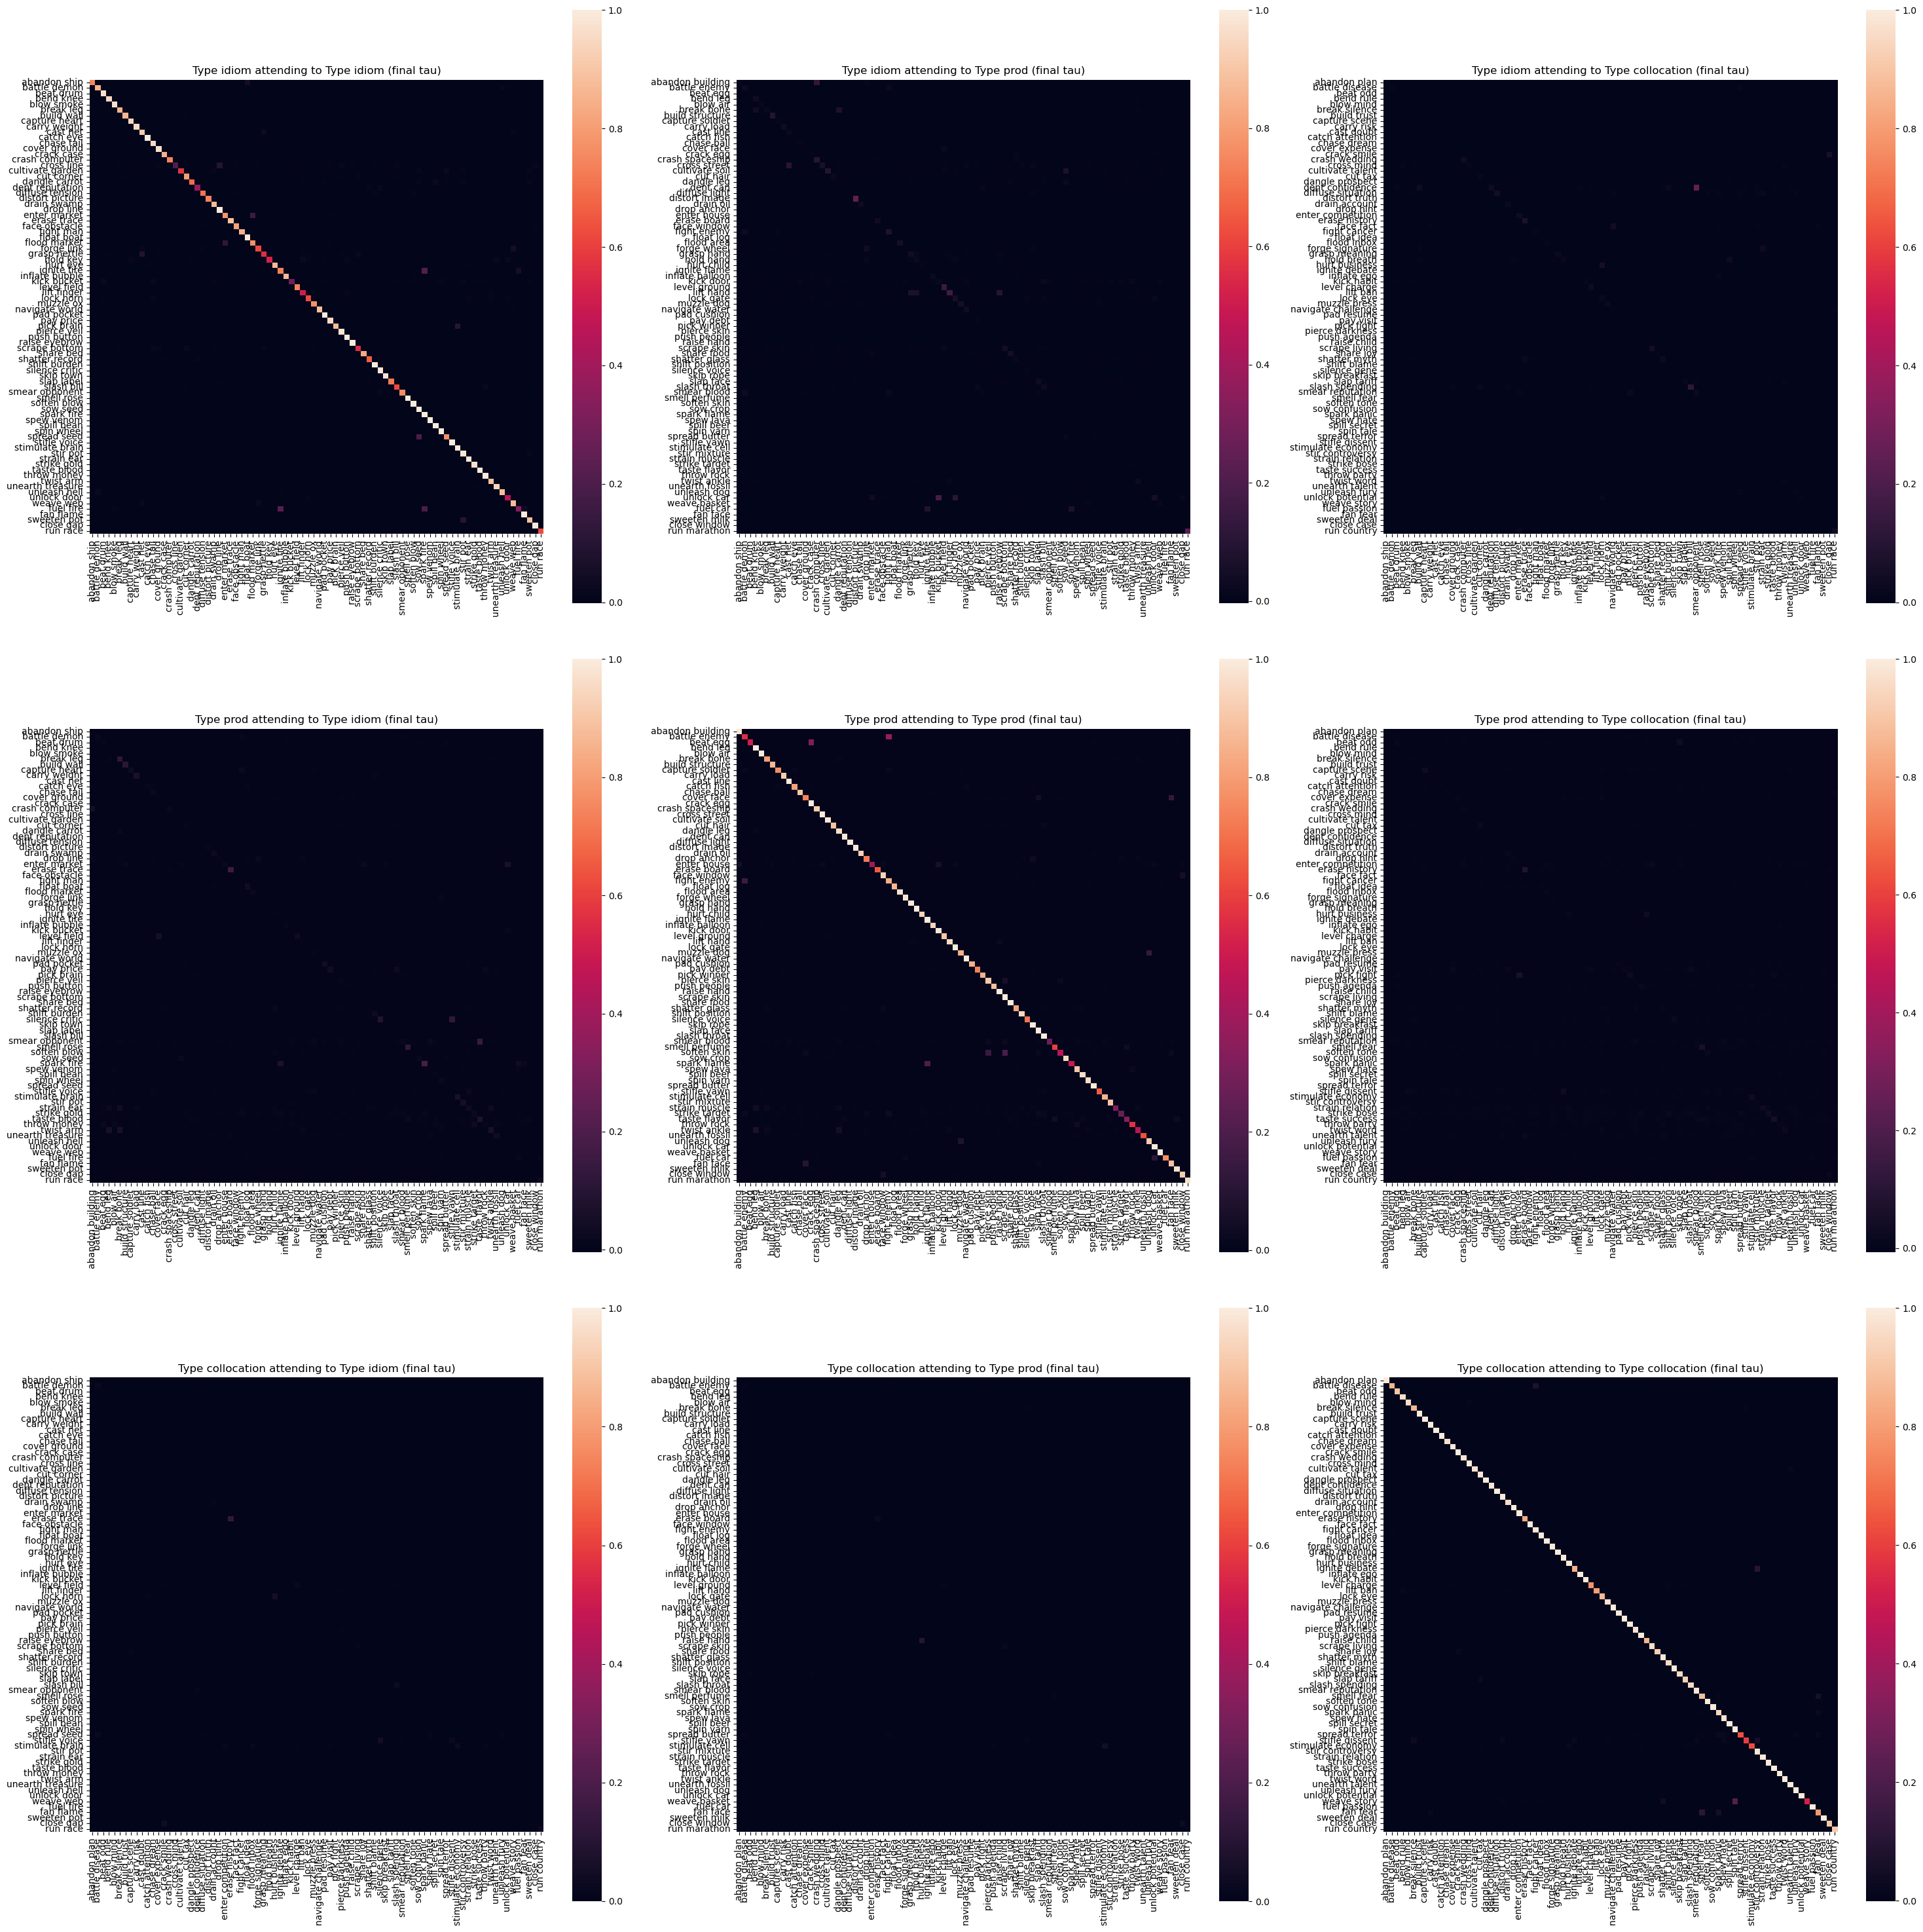

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

# cross_type_activations_final = {}

for i, type_i in enumerate(df_expanded["type"].unique()):
    for j, type_j in enumerate(df_expanded["type"].unique()):
        ax = axes[i, j]
        type_i_items = [item for item in collocs if df_index.loc[item]["type"] == type_i]
        type_i_selector = [i for i, item in enumerate(collocs) if item in type_i_items]
        type_j_items = [item for item in collocs if df_index.loc[item]["type"] == type_j]
        type_j_selector = [i for i, item in enumerate(collocs) if item in type_j_items]


        type_activations = activations_tau_stack[type_i_selector, :][:, type_j_selector]
        xticklabels = type_i_items
        yticklabels = type_j_items
        ax.set_title(f"Type {type_i} attending to Type {type_j} (final tau)")
        sns.heatmap(type_activations, ax=ax, square=True, vmax=1.0, xticklabels=xticklabels, yticklabels=yticklabels)
        # cross_type_activations_final[(type_i, type_j)] = {
        #     "activations": type_activations,
        #     "type_i_items": type_i_items,
        #     "type_j_items": type_j_items,
        # }
plt.tight_layout()

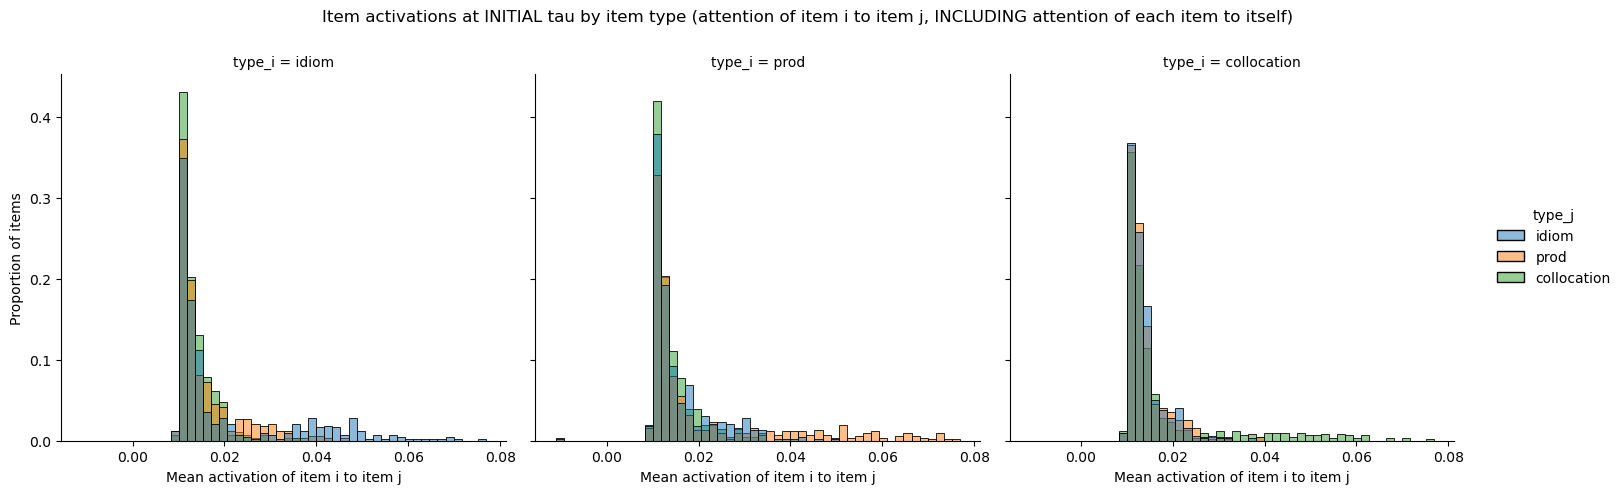

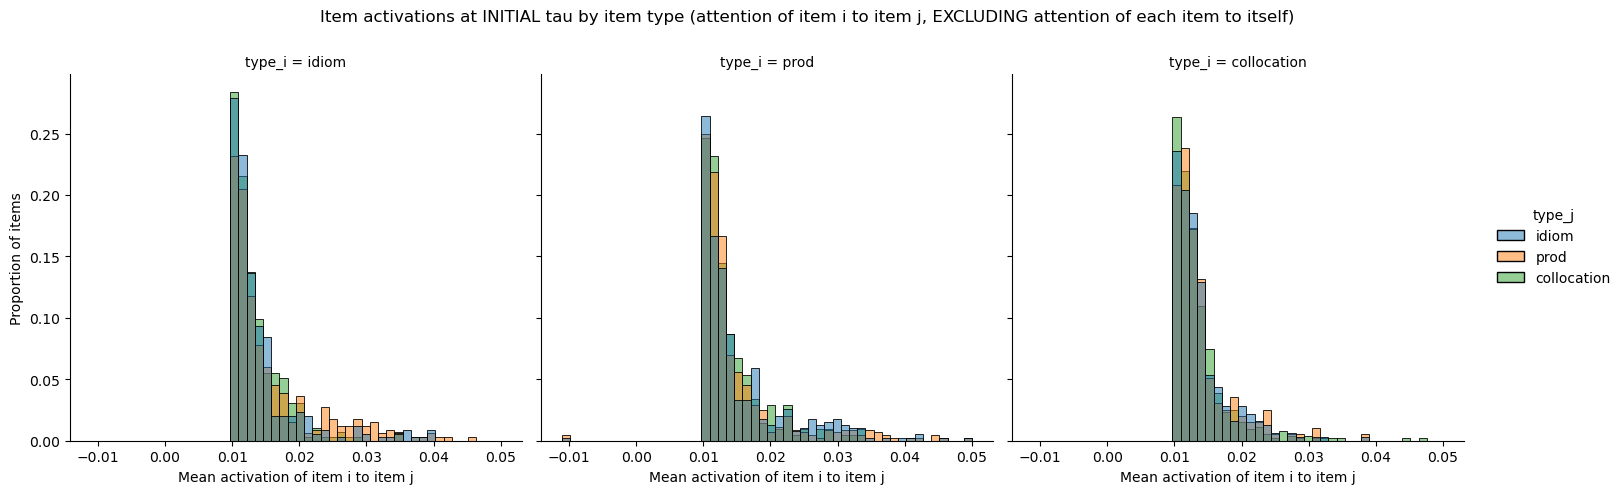

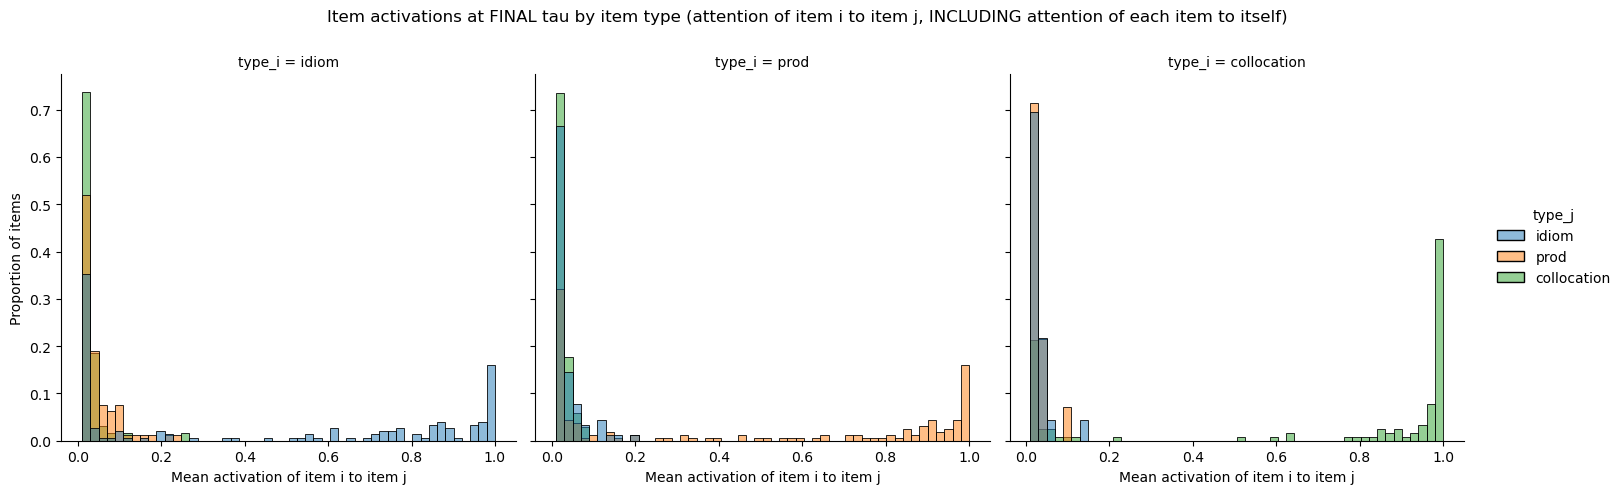

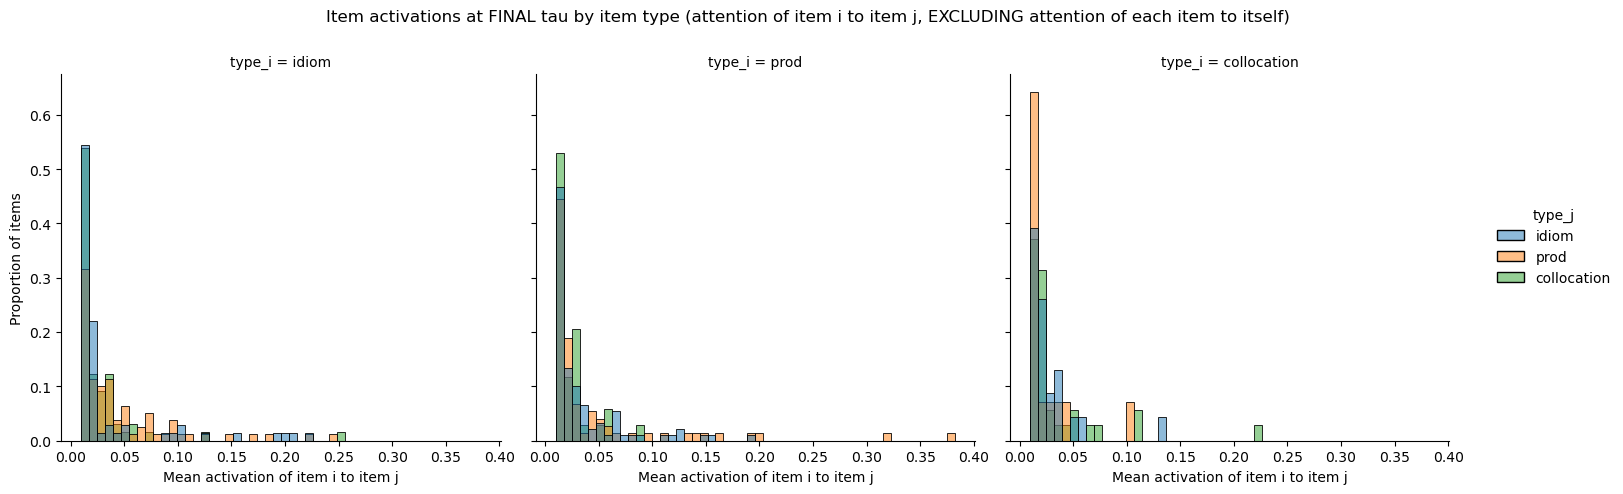

In [20]:
# fig, ax = plt.subplots(figsize=(10,5))
# ax.set_title("Mean similarity of activations, by item type")
for col, tau_label in zip(["mean_activation_0", "mean_activation_tau"], ["INITIAL tau", "FINAL tau"]):
    for filter_self in [False, True]:
        if filter_self:
            _subset = mean_activations_by_item_pair[
                mean_activations_by_item_pair["item_i"] != mean_activations_by_item_pair["item_j"]
            ]
        else:
            _subset = mean_activations_by_item_pair

        plot = sns.displot(
            _subset[abs(_subset[col]) > 0.01],
            x=col,
            col="type_i",
            hue="type_j",
            bins=50,
            # kde=True,
            # kind="kde",
            fill=True,
            # cumulative=True,
            # bw_adjust=0.25,
            # log_scale=(False, True),
            # multiple="stack",
            # log_scale=True,
            common_norm=False,
            stat="proportion",
        )
        plot.set(xlabel="Mean activation of item i to item j", ylabel="Proportion of items")
        plot.figure.subplots_adjust(top=.85)
        plot.figure.suptitle(f"Item activations at {tau_label} by item type (attention of item i to item j, {'EXCLUDING' if filter_self else 'INCLUDING'} attention of each item to itself)")


In [21]:
mean_activations_by_item_pair[mean_activations_by_item_pair["item_i"] == "abandon building"]["mean_activation_0"].abs().sum()

0.995767347925721

In [22]:
cum_activations_by_type = mean_activations_by_item_pair.groupby(["item_i", "type_j"], as_index=False).agg(
    mean_activation_0=("mean_activation_0", lambda x: sum(abs(x))),
    mean_activation_tau=("mean_activation_tau", lambda x: sum(abs(x))),
)
cum_activations_by_type["type_i"] = cum_activations_by_type["item_i"].apply(lambda x: df_index.loc[x, "type"])
cum_activations_by_type

item_i       type_j  mean_activation_0  mean_activation_tau  \
0    abandon building  collocation           0.283045             0.005173   
1    abandon building        idiom           0.274170             0.002655   
2    abandon building         prod           0.438552             0.992172   
3        abandon plan  collocation           0.457365             0.999251   
4        abandon plan        idiom           0.310804             0.000319   
..                ...          ...                ...                  ...   
733       weave story        idiom           0.296365             0.067665   
734       weave story         prod           0.225923             0.035092   
735         weave web  collocation           0.274182             0.015089   
736         weave web        idiom           0.389899             0.936751   
737         weave web         prod           0.333856             0.048153   

          type_i  
0           prod  
1           prod  
2           prod  
3    collocation  
4    collocation  
..           ...  
733  collocation  
734  collocation  
735        idiom  
736        idiom  
737        idiom  

[738 rows x 5 columns]

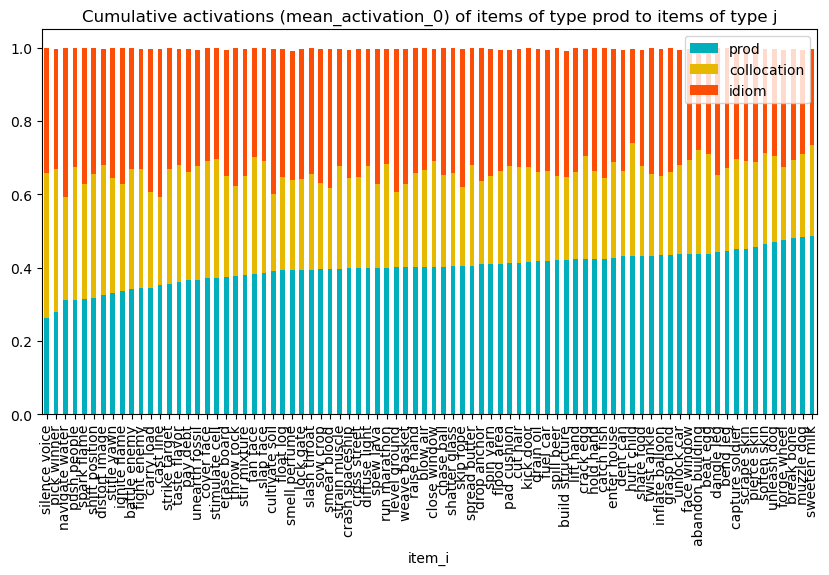

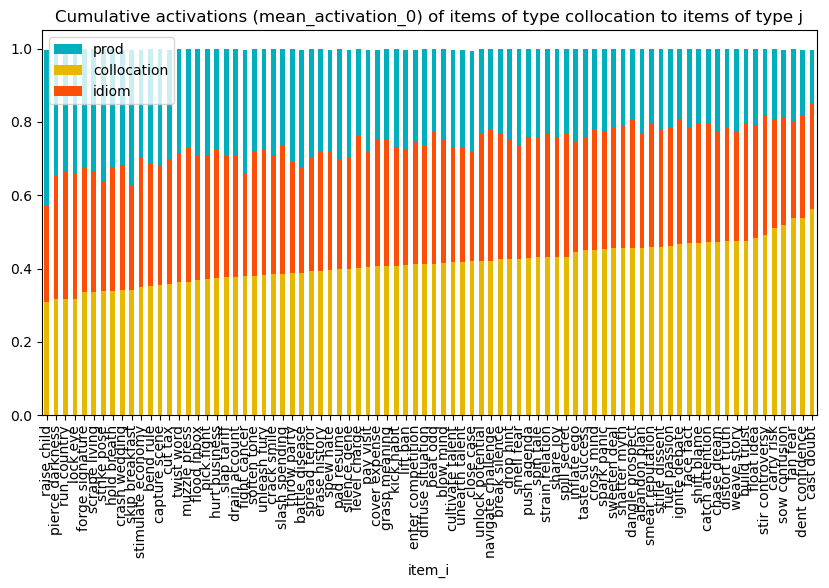

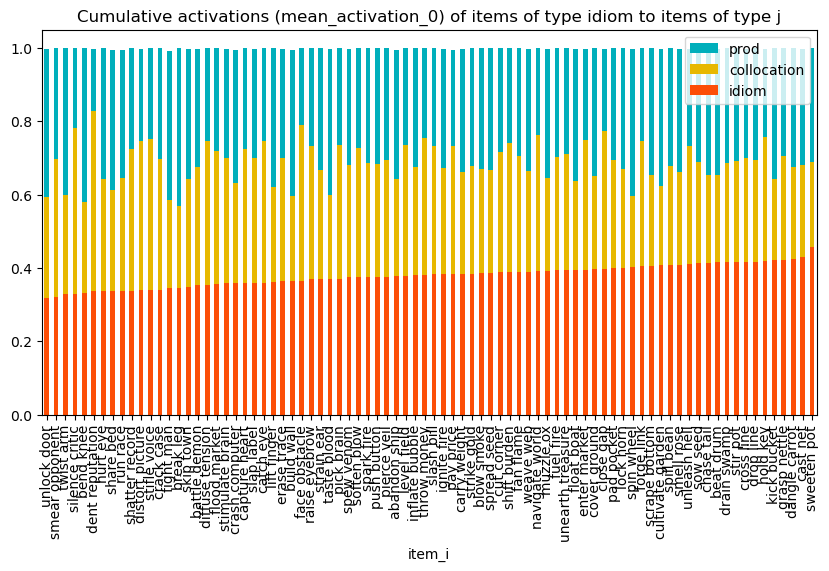

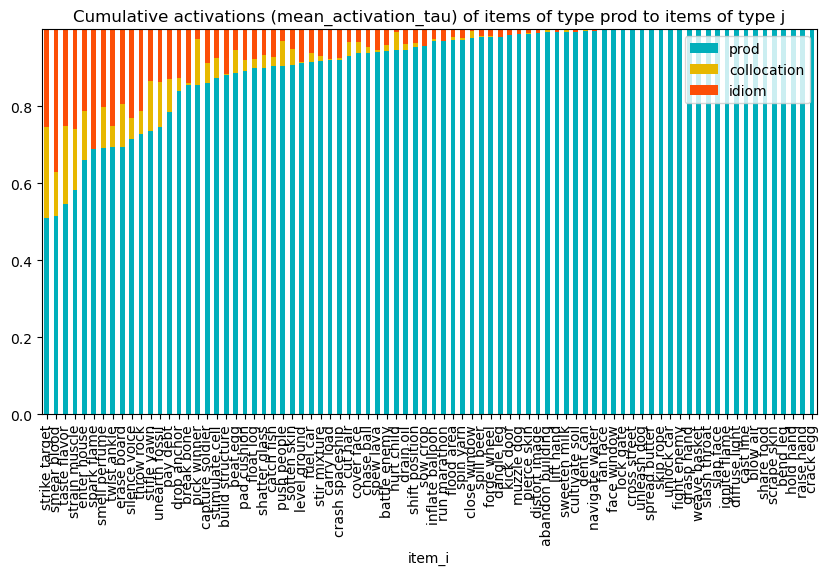

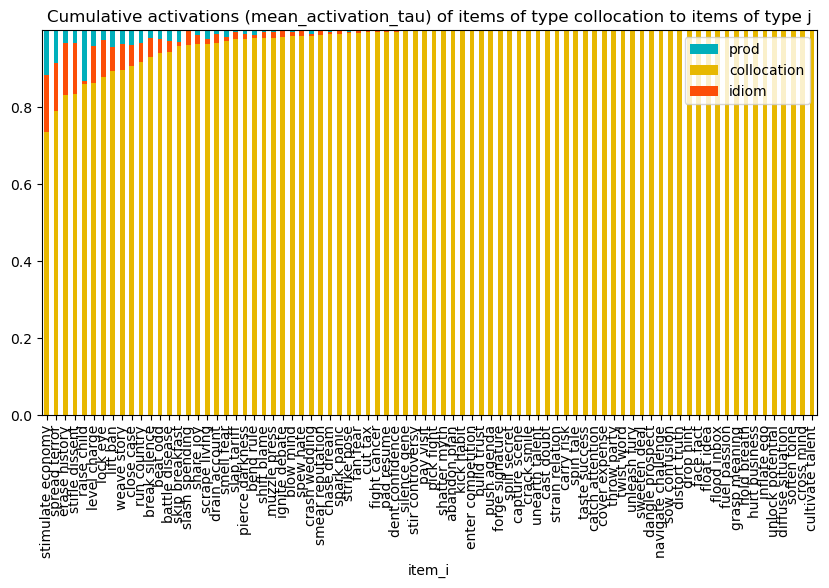

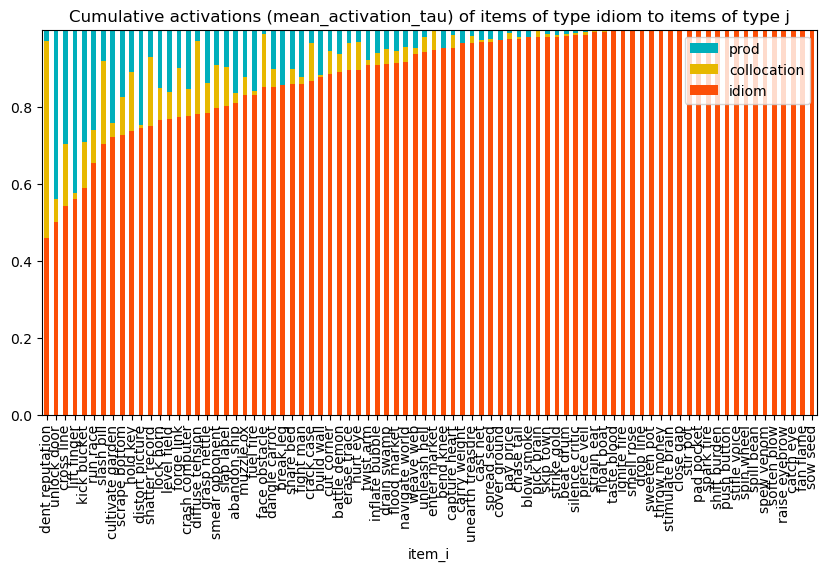

: 

In [23]:
#  Returns tuple of handles, labels for axis ax, after reordering them to conform to the label order `order`, and if unique is True, after removing entries with duplicate labels.
# credit: https://stackoverflow.com/a/35926913
def reorderLegend(ax=None,order=None,unique=False):
    if ax is None: ax=plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0])) # sort both labels and handles by labels
    if order is not None: # Sort according to a given list (not necessarily complete)
        keys=dict(zip(order,range(len(order))))
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t,keys=keys: keys.get(t[0],np.inf)))
    if unique:  labels, handles= zip(*unique_everseen(zip(labels,handles), key = labels)) # Keep only the first of each handle
    ax.legend(handles, labels)
    return(handles, labels)


def unique_everseen(seq, key=None):
    seen = set()
    seen_add = seen.add
    return [x for x,k in zip(seq,key) if not (k in seen or seen_add(k))]

# plot cum_activations_by_type as stacked barplot by item, faceted by type_i
for col in ["mean_activation_0", "mean_activation_tau"]:
    for type_i in cum_activations_by_type["type_i"].unique():
        fig, ax = plt.subplots(figsize=(10,5))
        subset = cum_activations_by_type[cum_activations_by_type["type_i"] == type_i]
        # pivot plot
        subset_pivot = subset.pivot(index="item_i", columns="type_j", values=col)
        # sort subset by activation to type_i
        subset_pivot = subset_pivot.sort_values(by=type_i, ascending=True)
        # reorder columns to put type_i first
        subset_pivot = subset_pivot[[type_i] + [col for col in subset_pivot.columns if col != type_i]]

        canon_ordering = {"prod": "#00AFBB", "collocation": "#E7B800", "idiom": "#FC4E07"}
        subset_pivot.plot(kind="bar", stacked=True, ax=ax, color=[canon_ordering[col] for col in subset_pivot.columns])
        reorderLegend(ax, order=canon_ordering.keys())
        ax.set_title(f"Cumulative activations ({col}) of items of type {type_i} to items of type j")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [40]:
joint

item       act  rt  n_kwics       id  participant  \
0      abandon ship  0.994129   3      100  6463343            1   
1      battle demon  0.992403   5      100  6463343            1   
2         beat drum  0.993219   5      100  6463343            1   
3         bend knee  0.991666   7      100  6463343            1   
4        blow smoke  0.983879  99      100  6463343            1   
...             ...       ...  ..      ...      ...          ...   
73795  fuel passion  0.926899  99      100  2533748          300   
73796      fan fear  0.991701   8      100  2533748          300   
73797  sweeten deal  0.886490  99      100  2533748          300   
73798    close case  0.992656   4      100  2533748          300   
73799   run country  0.990589   3      100  2533748          300   

      embedding_model  is_noise_embeddings  is_equal_frequency  minerva_k  \
0               sbert                False               False       0.99   
1               sbert                False               False       0.99   
2               sbert                False               False       0.99   
3               sbert                False               False       0.99   
4               sbert                False               False       0.99   
...               ...                  ...                 ...        ...   
73795           sbert                False               False       0.99   
73796           sbert                False               False       0.99   
73797           sbert                False               False       0.99   
73798           sbert                False               False       0.99   
73799           sbert                False               False       0.99   

       ...                                      activations_0  \
0      ...  [0.0016219119, 1.46322e-05, 0.0001169692, -7.2...   
1      ...  [6.3605e-06, 0.0013055577, 0.0001306476, 1.637...   
2      ...  [7.681450000000001e-05, 9.86095e-05, 0.0009827...   
3      ...  [-5.44072e-05, 2.09198e-05, 6.5729e-06, 0.0012...   
4      ...  [-6.14992e-05, 0.0001300747, 0.000373637700000...   
...    ...                                                ...   
73795  ...  [-8.30702e-05, 6.56462e-05, 9.698170000000001e...   
73796  ...  [6.42237e-05, 0.00032801200000000003, 9.70066e...   
73797  ...  [8.1007e-05, 2.8889e-06, 8.9767e-06, 0.0001484...   
73798  ...  [0.0003867122, -8.066e-07, 3.65302e-05, 3.4201...   
73799  ...  [0.0001117112, 4.33615e-05, 0.0001947394, 9.55...   

                                         activations_tau  fitem score  \
0      [0.020824166, 1.2350000000000001e-07, 8.9769e-...  16629   7.9   
1      [0.0, 0.050604146, 5.845e-07, 7.00000000000000...   4244   8.0   
2      [1.289e-07, 4.361e-07, 0.035223562300000004, 2...  15198   8.0   
3      [-1e-10, 0.0, 0.0, 0.09104201940000001, 1e-10,...  27701  10.5   
4      [0.0, 0.0, 0.0, 0.0, 0.200000003, 0.0, 0.0, 0....  11725   8.6   
...                                                  ...    ...   ...   
73795  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.38821970...   4510   7.0   
73796  [0.0, 2.293e-07, 0.0, -0.0, 1.8e-09, -0.0, 1.1...    846   7.4   
73797  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   8402   6.5   
73798  [0.000108967, -3.0000000000000004e-09, 4.27e-0...  27515   6.5   
73799  [7.1407e-06, 6.947e-07, 3.31772e-05, 4.4405e-0...  42155   6.7   

              type     verb     noun  stimuli_grammatical stimuli_plural  \
0            idiom  abandon     ship         abandon ship   abandon ship   
1            idiom   battle    demon  battle one's demons  battle demons   
2            idiom     beat     drum      beat one's drum     beat drums   
3            idiom     bend     knee        bend the knee     bend knees   
4            idiom     blow    smoke           blow smoke     blow smoke   
...            ...      ...      ...                  ...            ...   
73795  collocation     fuel  passion   fuel one's passion   fuel passion   
73796  

In [39]:
# # split activations_stack_0 by type
# from collections import defaultdict
# activations_0_stack_by_type = {}

# for type_i in df_expanded["type"].unique():
#     # for type_j in df_expanded["type"].unique():
#     type_i_selector, type_i_items = zip(*[
#             (i, item) for i, item in enumerate(collocs) if df_index.loc[item]["type"] == type_i
#         ])
#         # type_j_selector, type_j_items = zip(*[
#         #     (i, item) for i, item in enumerate(collocs) if df_index.loc[item]["type"] == type_j
#         # ])
#     activations_0_stack_by_type[type_i][type_j] = activations_0_stack[type_i_selector, :][:, type_j_selector]

# # plot activations_0_stack_by_type
# fig, axes = plt.subplots(3, 3, figsize=(30, 30))

# for i, type_i in enumerate(df_expanded["type"].unique()):
#     for j, type_j in enumerate(df_expanded["type"].unique()):
#         ax = axes[i, j]
#         type_activations = activations_0_stack_by_type[type_i][type_j]
#         xticklabels = type_i_items
#         yticklabels = type_j_items
#         ax.set_title(f"Type {type_i} attending to Type {type_j}")
#         sns.heatmap(type_activations, ax=ax, square=True, xticklabels=xticklabels, yticklabels=yticklabels, vmax=0.1)

torch.Size([82, 82])

AttributeError: Rectangle.set() got an unexpected keyword argument 'multiple'

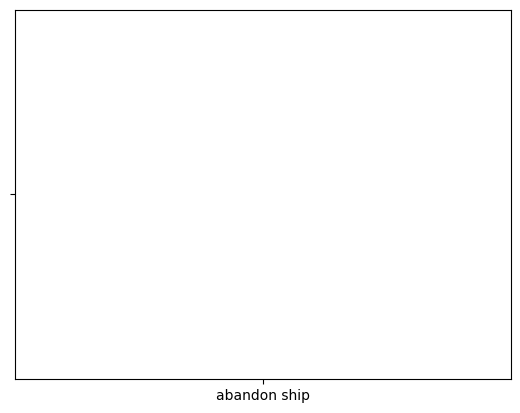

In [58]:
# fig, ax = plt.subplots(figsize=(10,5))
# ax.set_title("Mean similarity of activations, by item type")
for col, tau_label in zip(["mean_activation_0", "mean_activation_tau"], ["INITIAL tau", "FINAL tau"]):
    for filter_self in [False, True]:
        if filter_self:
            _subset = mean_activations_by_item_pair[
                mean_activations_by_item_pair["item_i"] != mean_activations_by_item_pair["item_j"]
            ]
        else:
            _subset = mean_activations_by_item_pair

        plot = sns.barplot(
            _subset,#[_subset[col] > 0.01],
            x="item_i",
            # col="type_i",
            hue="type_j",
            # bins=50,
            # kde=True,
            # kind="kde",
            # fill=True,
            # cumulative=True,
            # bw_adjust=0.25,
            # log_scale=(False, True),
            multiple="stack",
            # log_scale=True,
            common_norm=False,
            stat="proportion",
        )
        plot.set(xlabel="Mean activation of item i to item j", ylabel="Proportion of items")
        plot.figure.subplots_adjust(top=.85)
        plot.figure.suptitle(f"Item activations at {tau_label} by item type (attention of item i to item j, {'EXCLUDING' if filter_self else 'INCLUDING'} attention of each item to itself)")


In [149]:
def minerva_activate(probe, Mat, tau=1.0):
    similarity = torch.cosine_similarity(probe, Mat, dim=1)
    activation = torch.abs(similarity**tau) * torch.sign(
        similarity
    )  # make sure we preserve the signs
    # return activation / activation.sum()
    return activation

# matrix0, sampled_items0 = get_minerva_matrix_and_sims(
#     item_embeddings, item_freq, forget_prob=FORGET_PROB, M=10000, seed=0
# )

probe_matrix_sims = torch.stack(
    [minerva_activate(torch.tensor(row["vec"]), sampled_matrix, tau=round(row["mean_rt"])) for row in agg_results_sbert.iloc]
    # [minerva_activate(torch.tensor(row["vec"]), sampled_matrix, tau=1) for row in agg_results.iloc]
)

n_items = df_expanded["item"].nunique()

pairwise_agg_sims, data_df = get_mean_sims(probe_matrix_sims, sampled_items, n_items)
data_df.rename(columns={"mean_sim": "mean_activation"}, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pairwise_agg_sims, ax=ax, square=True)

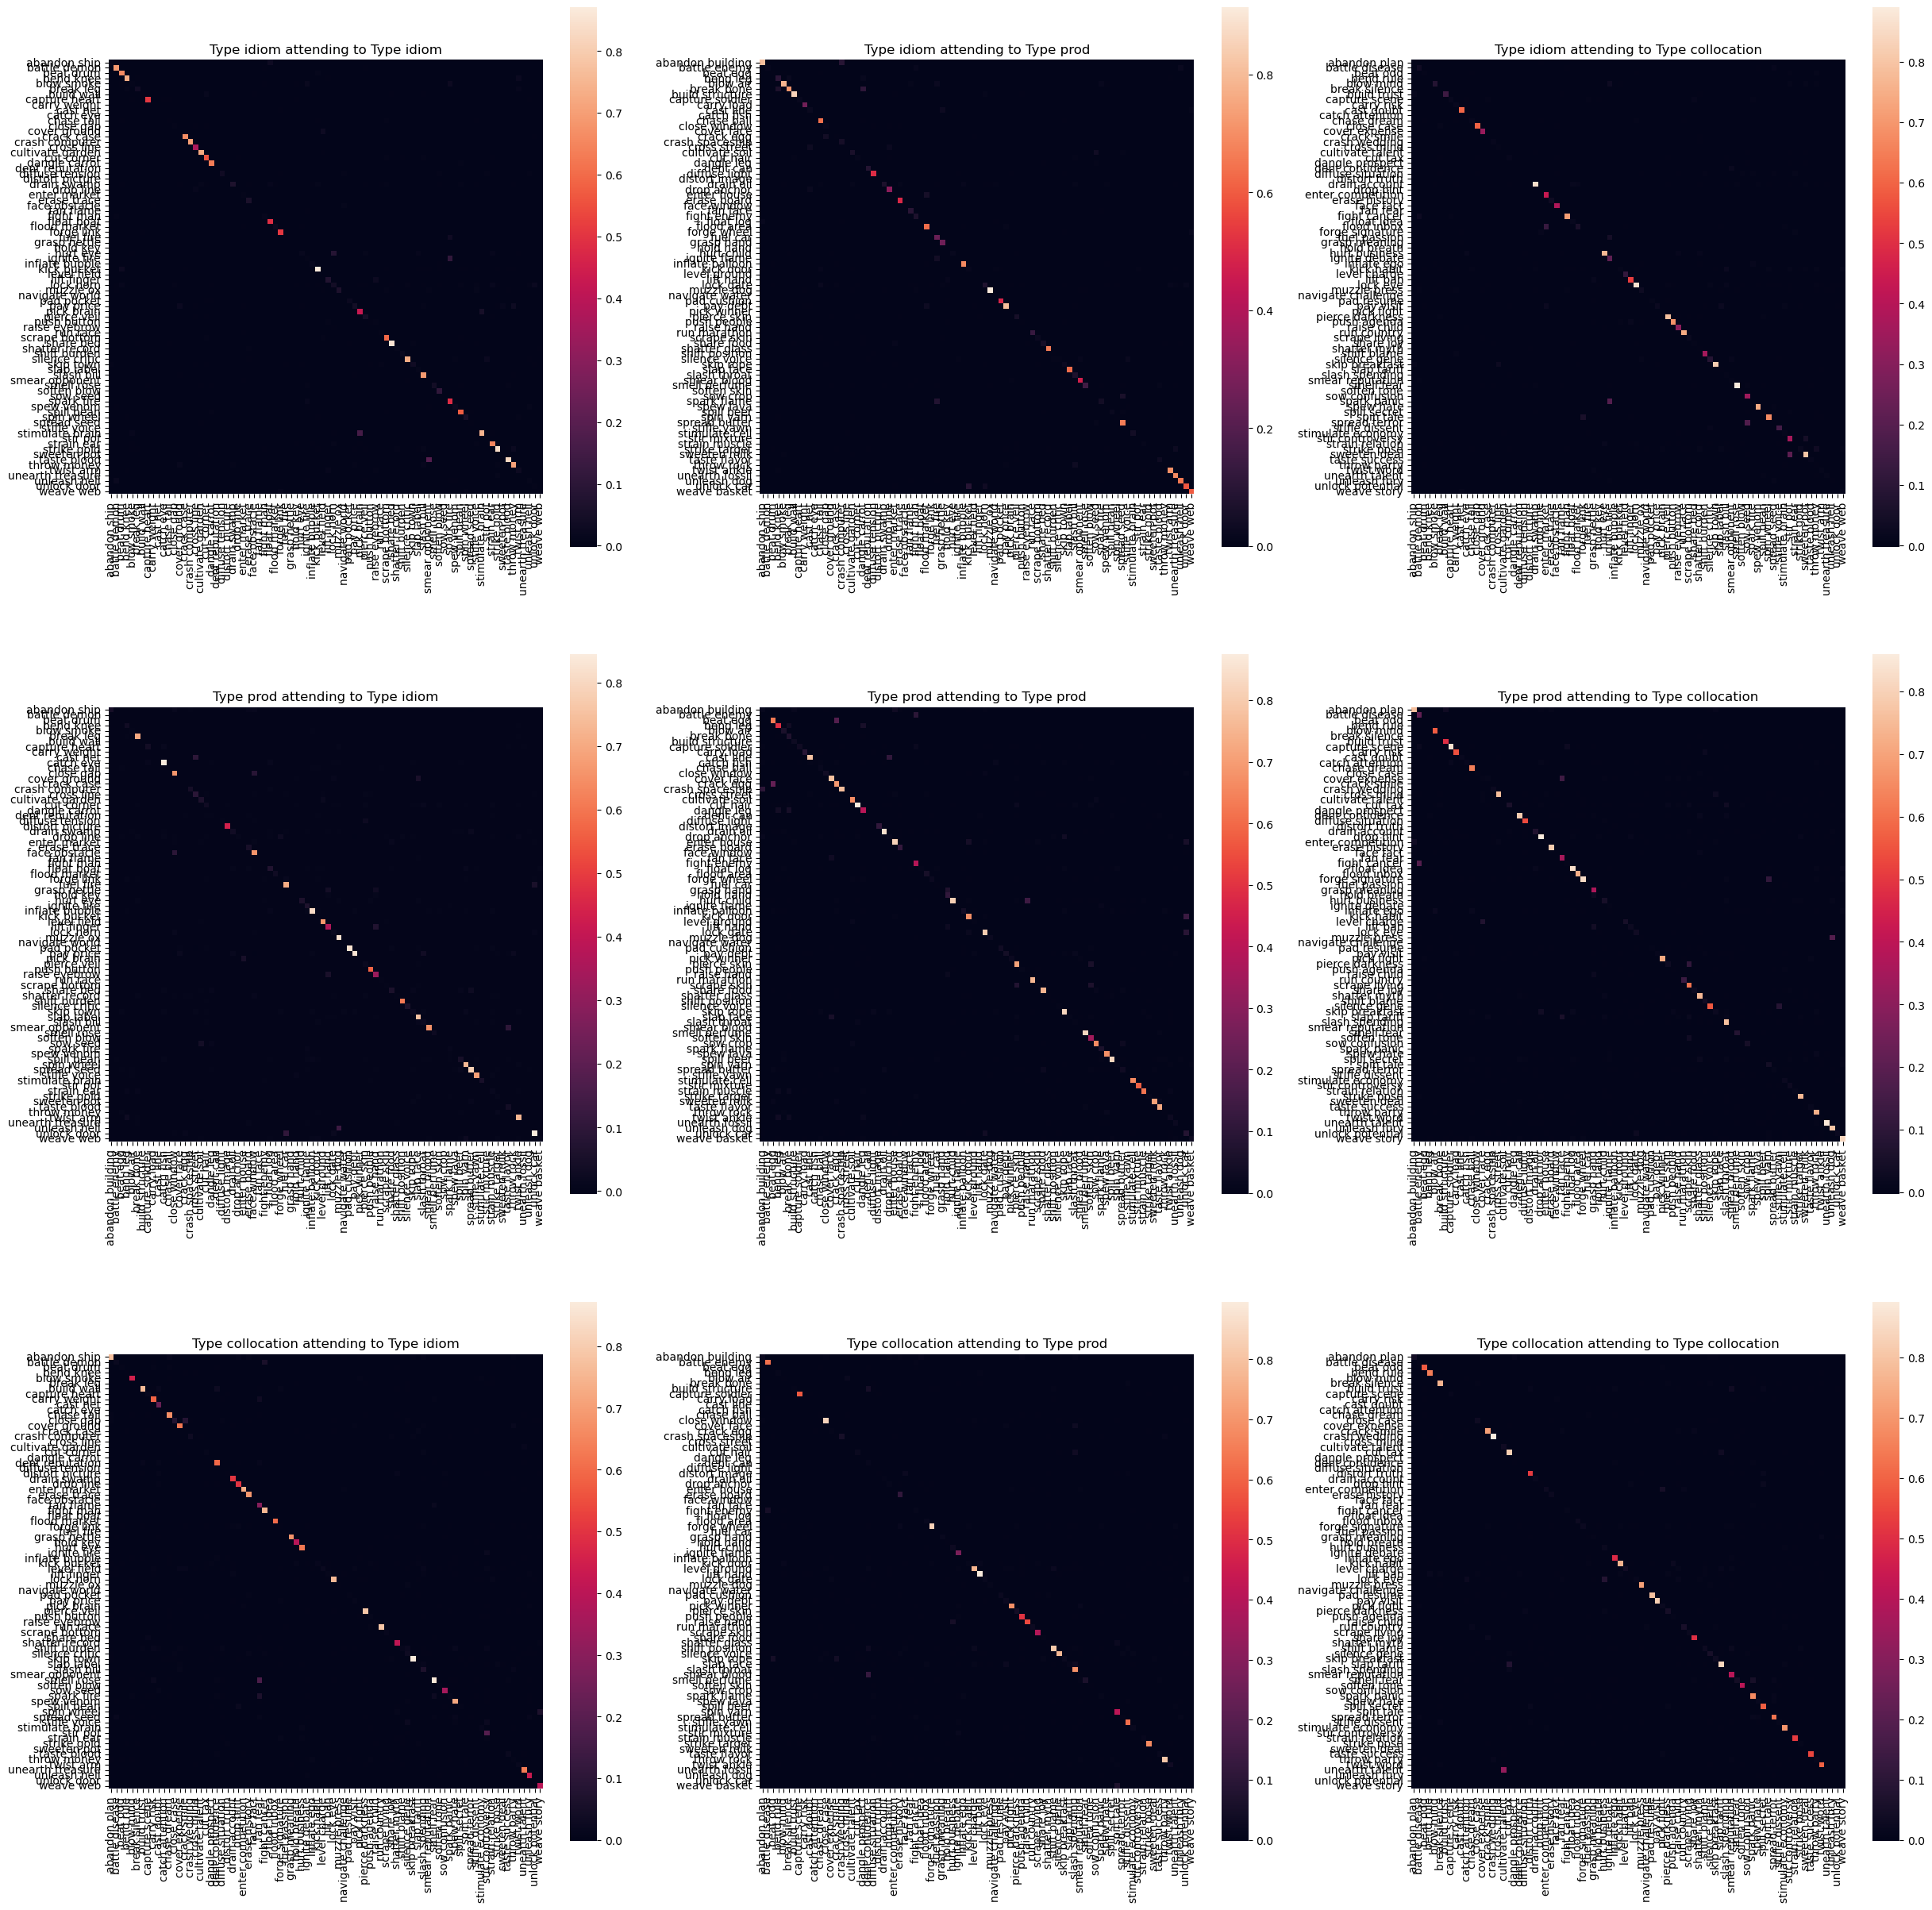

In [111]:
probe_matrix_sims = torch.stack(
    [minerva_activate(torch.tensor(row["vec"]), sampled_matrix, tau=round(row["mean_rt"])) for row in agg_results_sbert.iloc]
    # [minerva_activate(torch.tensor(row["vec"]), sampled_matrix, tau=1) for row in agg_results_sbert.iloc]
)

n_items = df_expanded["item"].nunique()

pairwise_agg_sims, data_df = get_mean_sims(probe_matrix_sims, sampled_items, n_items)

data_df.rename(columns={"mean_sim": "mean_activation"}, inplace=True)

fig, axes = plt.subplots(3, 3, figsize=(30, 30))

for i, type_i in enumerate(df_expanded["type"].unique()):
    for j, type_j in enumerate(df_expanded["type"].unique()):
        ax = axes[i, j]
        type_i_selector = np.where(agg_results_sbert["type"] == type_i)[0]
        type_j_selector = np.where(agg_results_sbert["type"] == type_j)[0]

        pairwise_sims_subset = pairwise_agg_sims[type_i_selector, :][:, type_j_selector]
        xticklabels = agg_results_sbert.iloc[type_i_selector]["item"]
        yticklabels = agg_results_sbert.iloc[type_j_selector]["item"]
        ax.set_title(f"Type {type_i} attending to Type {type_j}")
        sns.heatmap(pairwise_sims_subset, ax=ax, square=True, xticklabels=xticklabels, yticklabels=yticklabels)

In [112]:
data_df.groupby("item_i").apply(lambda x: x.sort_values("mean_activation", ascending=False).head(5)).reset_index(drop=True).to_csv("sbert_top5_activations.csv", index=False)

/var/folders/l6/19zx3k5x4sbd3l0r0xdjx8vh0000gn/T/ipykernel_3390/16874416.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_df.groupby("item_i").apply(lambda x: x.sort_values("mean_activation", ascending=False).head(5)).reset_index(drop=True).to_csv("sbert_top5_activations.csv", index=False)


In [113]:
data_df.sort_values("mean_activation", ascending=False).groupby("item_i").head(5).to_csv("sbert_top5_by_activation.csv", index=False)

Text(0.5, 0.98, 'Item activations at mean final tau (attention of item i to item j), by item type')

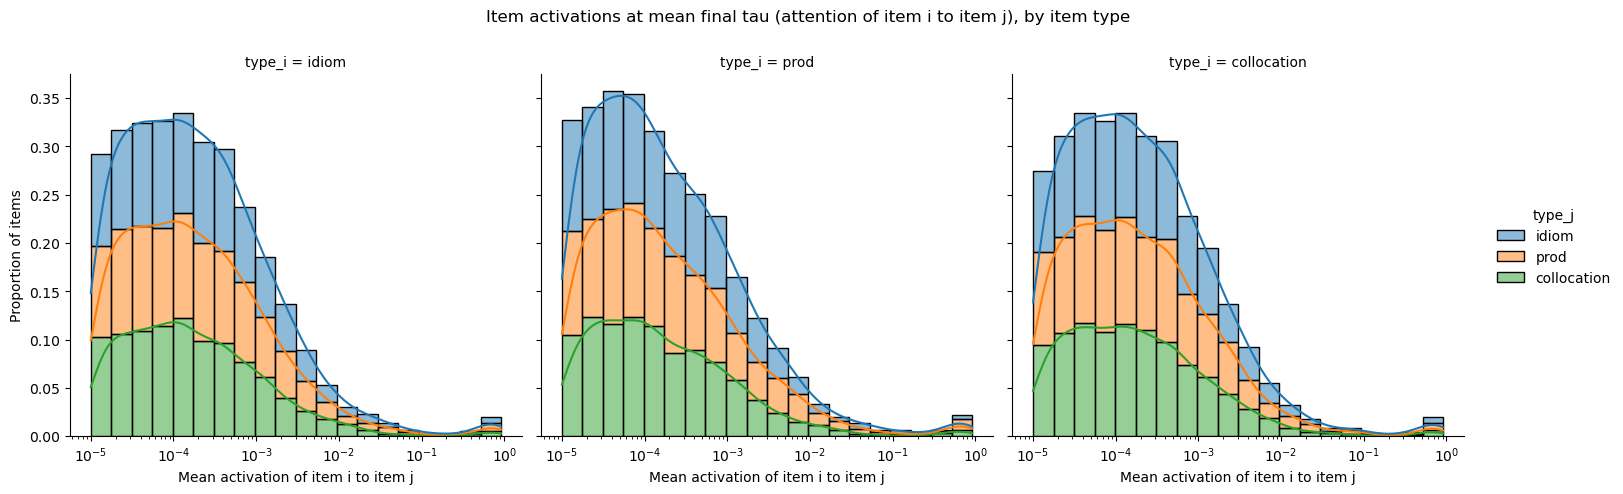

In [114]:
# fig, ax = plt.subplots(figsize=(10,5))
# ax.set_title("Mean similarity of activations, by item type")
plot = sns.displot(
    data_df[abs(data_df["mean_activation"]) > 1e-5],
    x="mean_activation",
    col="type_i",
    hue="type_j",
    bins=20,
    kde=True,
    # kind="kde",
    # fill=True,
    # bw_adjust=0.25,
    # log_scale=(False, True),
    multiple="stack",
    log_scale=True,
    common_norm=False,
    stat="proportion",
)
plot.set(xlabel="Mean activation of item i to item j", ylabel="Proportion of items")
plot.figure.subplots_adjust(top=.85)
plot.figure.suptitle("Item activations at mean final tau (attention of item i to item j), by item type")
# plt.title("Mean similarity of activations, by item type")
# plt.xlabel("Mean similarity of activations")

/var/folders/l6/19zx3k5x4sbd3l0r0xdjx8vh0000gn/T/ipykernel_3390/188644788.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_df_grouped = data_df.groupby("item_i").apply(lambda x: x.nlargest(TOP_N, "mean_activation")).reset_index(drop=True)


Text(0.5, 0.98, 'Item activations of top 3 items at mean final tau (attention of item i to item j), by item type')

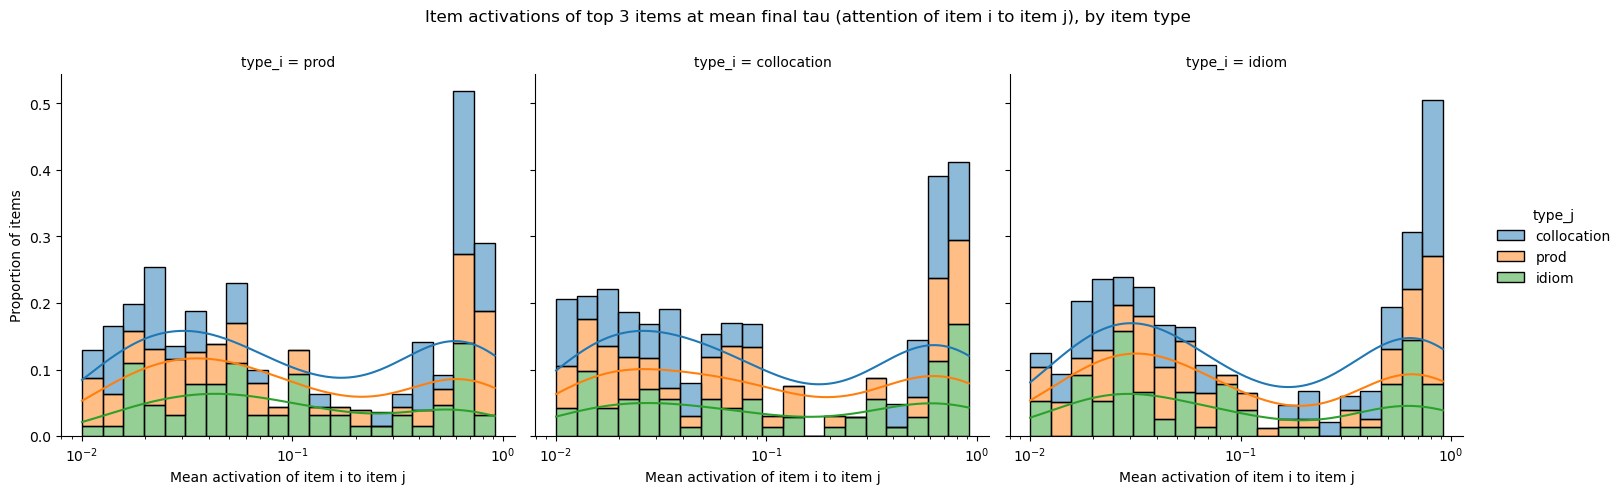

In [115]:
# group data_df by item_i and keep only the top 10 item_j
TOP_N = 3
data_df_grouped = data_df.groupby("item_i").apply(lambda x: x.nlargest(TOP_N, "mean_activation")).reset_index(drop=True)
plot = sns.displot(
    data_df_grouped[data_df_grouped["mean_activation"] > 0.01],
    x="mean_activation",
    col="type_i",
    hue="type_j",
    # kind="kde",
    # fill=True,
    # bw_adjust=0.25,
    # log_scale=(False, True),
    multiple="stack",
    kde=True,
    bins=20,
    log_scale=True,
    common_norm=False,
    stat="proportion",
)
plot.set(xlabel="Mean activation of item i to item j", ylabel="Proportion of items")
plot.figure.subplots_adjust(top=.85)
plot.figure.suptitle(f"Item activations of top {TOP_N} items at mean final tau (attention of item i to item j), by item type")


In [116]:
data_df.groupby("item_i").apply(lambda x: x.nlargest(3, "mean_activation")).reset_index(drop=True).to_csv("tmp.csv")

/var/folders/l6/19zx3k5x4sbd3l0r0xdjx8vh0000gn/T/ipykernel_3390/1848195402.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_df.groupby("item_i").apply(lambda x: x.nlargest(3, "mean_activation")).reset_index(drop=True).to_csv("tmp.csv")


In [117]:
data_df[(data_df["item_i"] == "abandon building") & (data_df["item_j"] == "abandon building")]

item_i type_i            item_j type_j  mean_activation
247  abandon building   prod  abandon building   prod         0.041903

In [118]:
# violin plots
sns.violinplot(
    data=data_df[abs(data_df["mean_sim"]) > 0.01],
    x="type_i",
    y="mean_sim",
    hue="type_j",
    inner="quart",
    linewidth=1,
)

KeyError: 'mean_sim'

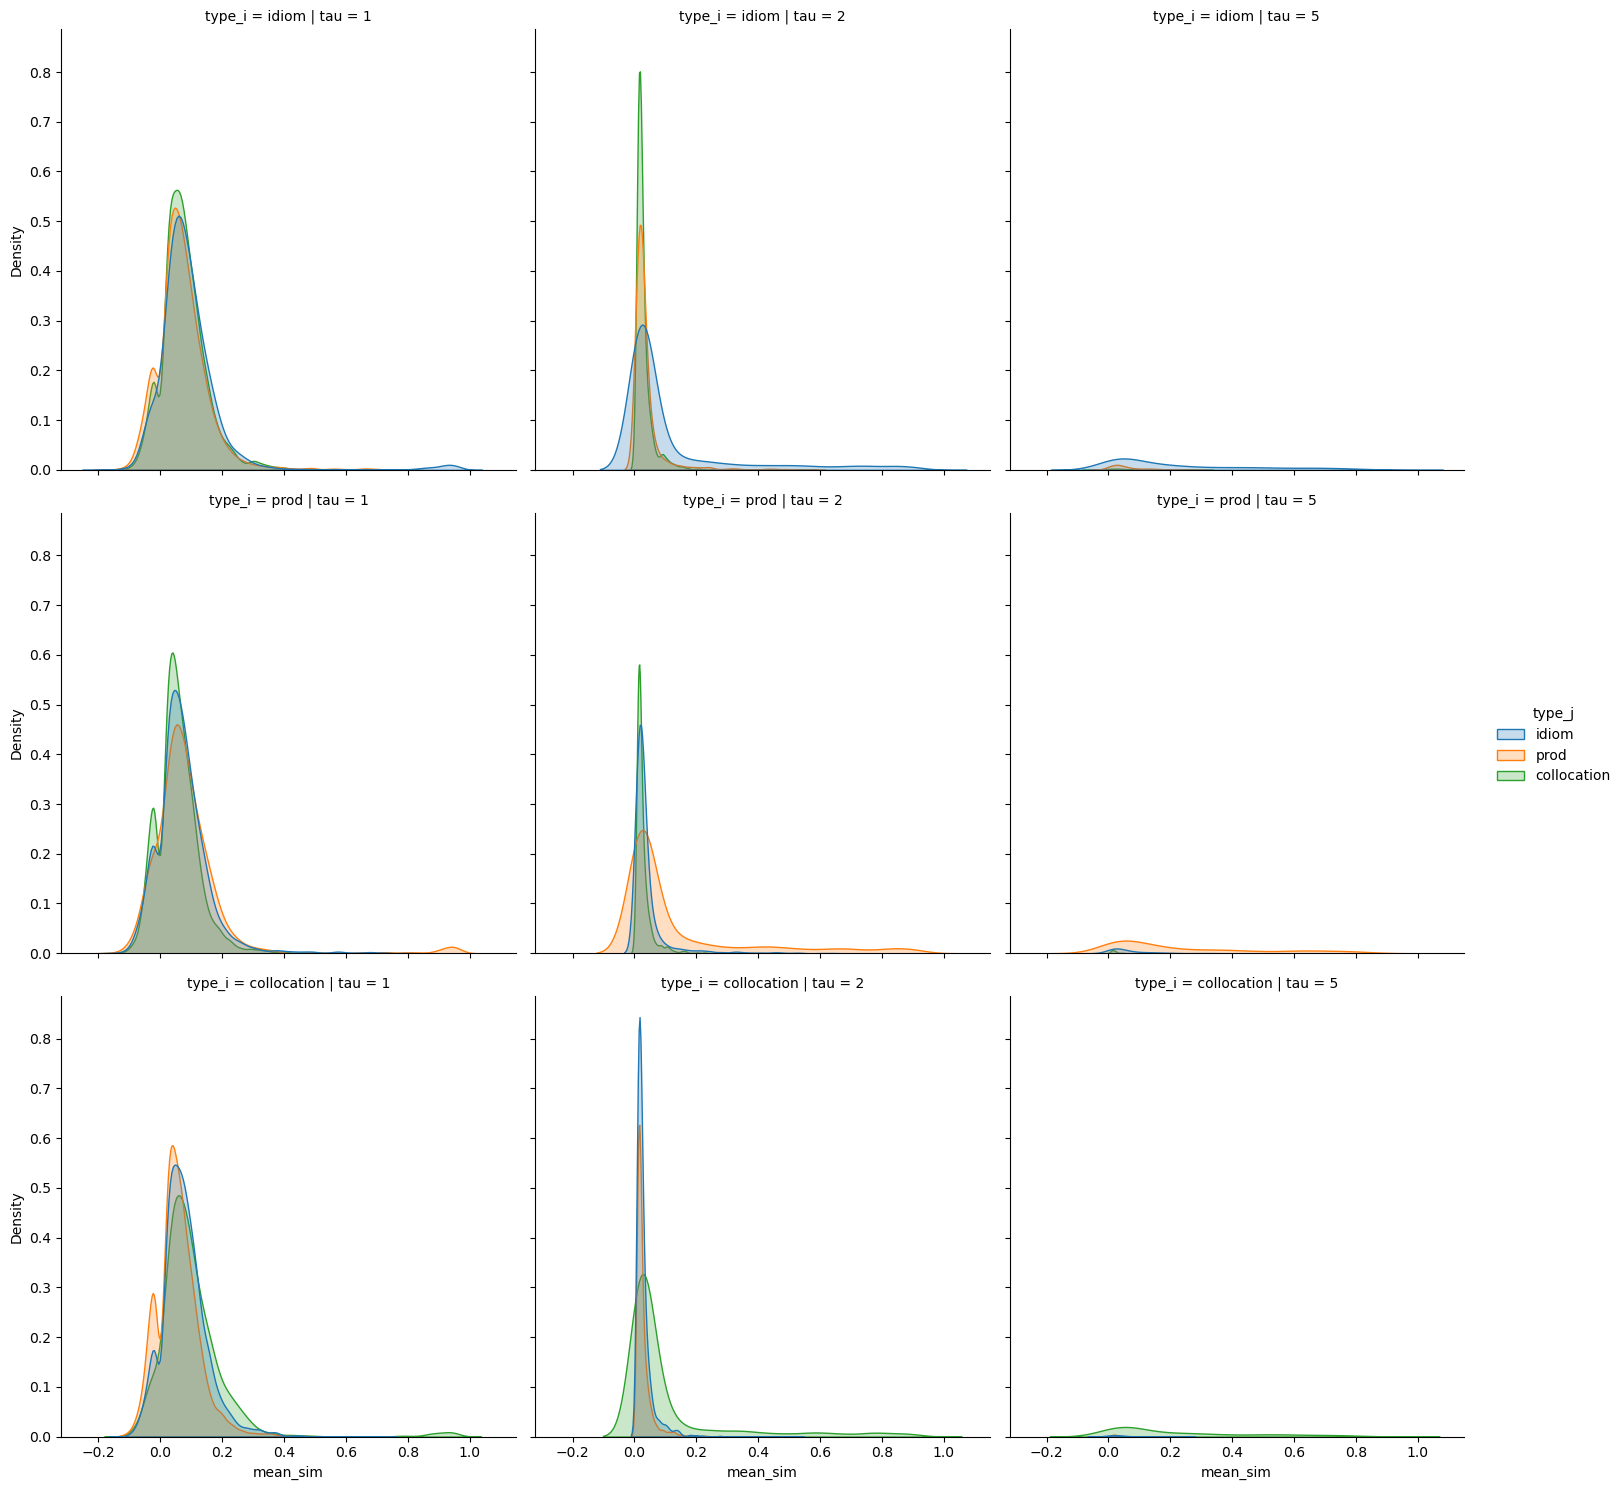

In [ ]:
_simstau1 = df_agg_sims.copy()
_simstau1["tau"] = 1

_simstau2 = _sims.copy()
_simstau2["tau"] = 2
_simstau2["mean_sim"] = _sims["mean_sim"] ** 2

_simstau5 = _sims.copy()
_simstau5["tau"] = 5
_simstau5["mean_sim"] = _sims["mean_sim"] ** 5

_sims = pd.concat([_simstau1, _simstau2, _simstau5])

# _sims["mean_sim_tau2"] = _sims["mean_sim"] ** 2
# _sims = _sims[abs(_sims["mean_sim_tau2"]) > 0.01]
# _sims["mean_sim_tau5"] = _sims["mean_sim"] ** 5
# _sims = _sims[abs(_sims["mean_sim_tau5"]) > 0.01]
# _sims["mean_sim_tau10"] = _sims["mean_sim"] ** 5
# _sims = _sims[abs(_sims["mean_sim_tau5"]) > 0.01]

# _sims["mean_sim"] = _sims["mean_sim"]
sns.displot(
    _sims[abs(_sims["mean_sim"]) > 0.01],
    x="mean_sim",
    row="type_i",
    col="tau",
    hue="type_j",
    kind="kde",
    fill=True,
    # bw_adjust=0.25,
    # log_scale=(False, True),
)

In [ ]:
# typewise agg sims

# get the type of each item
item_types = df_expanded["type"].unique()
n_per_type = df_expanded["type"].value_counts()[item_types[0]]

type_agg_sims = torch.zeros(len(item_types), len(item_types), n_per_type)

for i, t1 in enumerate(item_types):
    for j, t2 in enumerate(item_types):
        where_t1 = df_expanded["type"] == t1
        where_t2 = df_expanded["type"] == t2
        type_agg_sims[i, j] = pairwise_agg_sims[where_t1][:, where_t2].mean(dim=0)

type_agg_sims.shape

# sns.heatmap(pairwise_agg_sims, xticklabels=item_types, yticklabels=item_types)

torch.Size([3, 3, 82])